In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.insert(1, "../src/")
import project_up as upwkonrad
import project_cmip as upcmip

In [2]:
base = "/work/mh0066/m300556/konrad_exps/output_files"
upcmip.cst["base"] = "/work/bm1205/m300556/CMIP/zenodo"

# FIGURE 1. Annotated NT-diagrams for U4 with prescribed O$_{3}$ and instantaneous change in upwelling

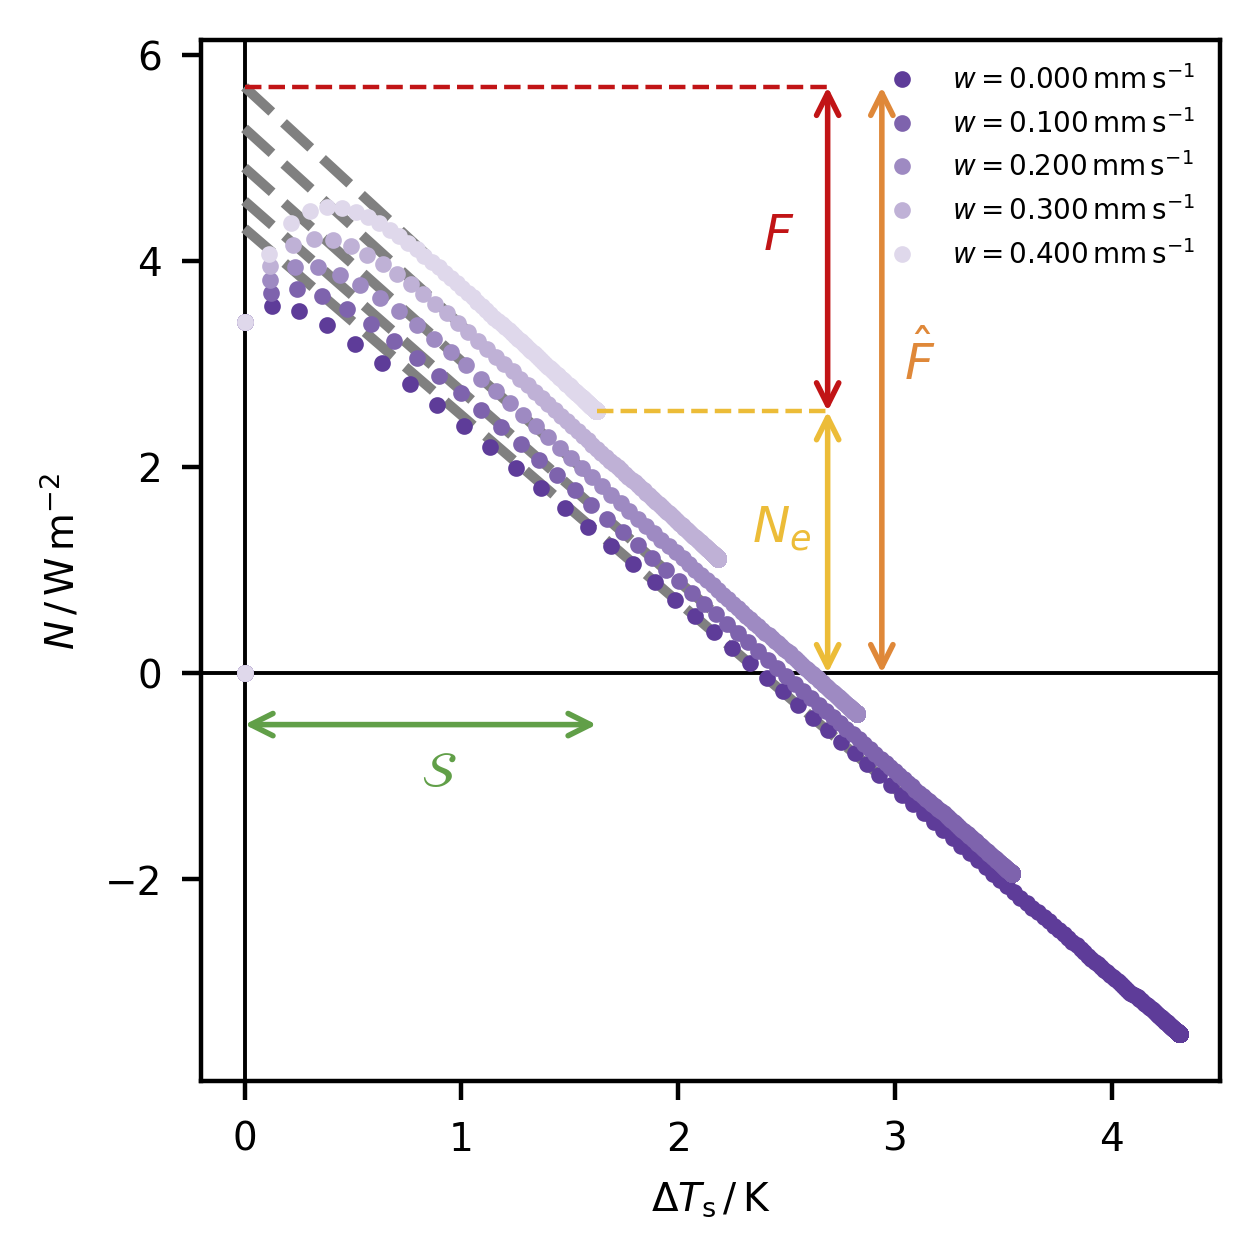

In [3]:
fig, axes, data = upwkonrad.diagram_NT(
    e="2xCO2",
    RH=0.4,
    O3="f",
    ws=[0.000, 0.100, 0.200, 0.300, 0.400,],
    fname="fig01.pdf",
    lims=(-0.2, 4.5),
    save=True,
    close=False,
    picontrol=True,
    labels=True,
    base=base,
)

# Annotations

experiment = "2xCO2"
relhum = 0.4
oz = "f"
upw = 0.400
ΔTsref = 2.69
exx = 0.25
lw = 0.8
Fcolor = (193/255, 20/255, 22/255)
Nfcolor = (236/255, 188/255, 56/255)
Fpcolor = (223/255, 136/255, 57/255)
Scolor = (97/255, 159/255, 72/255)

ΔTs0 = data["S"][experiment][relhum][oz][upw]
Nf = data["N_f"][experiment][relhum][oz][upw]
F = data["F_eff,f"][experiment][relhum][oz][upw] + Nf
ex = ΔTsref - ΔTs0

del data, experiment, relhum, oz, upw

axes.annotate(
    "",
    xytext=(ΔTs0 + ex, Nf),
    xy=(ΔTs0 + ex, F),
    arrowprops=dict(arrowstyle="<->", color=Fcolor, shrinkA=0, shrinkB=0),
)
axes.annotate(
    "$F$",
    xytext=(ΔTs0 + ex - 0.3, Nf + ((F - Nf) / 2)),
    xy=(ΔTs0 + ex - 0.3, Nf + ((F - Nf) / 2)),
    color=Fcolor,
    fontsize=9,
)
axes.annotate(
    "",
    xytext=(ΔTs0 + ex, 0),
    xy=(ΔTs0 + ex, Nf),
    arrowprops=dict(arrowstyle="<->", color=Nfcolor, shrinkA=0, shrinkB=0),
)
axes.annotate(
    "$N_{e}$",
    xytext=(ΔTs0 + ex - 0.35, Nf / 2),
    xy=(ΔTs0 + ex - 0.35, Nf / 2),
    color=Nfcolor,
    fontsize=9,
)
axes.annotate(
    "",
    xytext=(ΔTs0 + ex + exx, 0),
    xy=(ΔTs0 + ex + exx, F),
    arrowprops=dict(arrowstyle="<->", color=Fpcolor, shrinkA=0, shrinkB=0),
)
axes.annotate(
    "$\hat{F}$",
    xytext=(ΔTs0 + ex + exx + 0.1, F / 2),
    xy=(ΔTs0 + ex + exx + 0.1, F / 2),
    color=Fpcolor,
    fontsize=9,
)
axes.annotate(
    "",
    xytext=(0, -0.5),
    xy=(ΔTs0, -0.5),
    arrowprops=dict(arrowstyle="<->", color=Scolor, shrinkA=0, shrinkB=0),
)
axes.annotate(
    "$\mathcal{S}$",
    xytext=(ΔTs0 / 2, -1.1),
    xy=(ΔTs0 / 2, -1.1),
    color=Scolor,
    fontsize=9,
)

xmin = axes.transLimits.transform((0, F))[0]
xmax = axes.transLimits.transform((ΔTs0 + ex, F))[0]
axes.axhline(y=F, xmin=xmin, xmax=xmax, lw=lw, ls="--", color=Fcolor)
xmin = axes.transLimits.transform((ΔTs0, Nf))[0]
xmax = axes.transLimits.transform((ΔTs0 + ex, Nf))[0]
axes.axhline(y=Nf, xmin=xmin, xmax=xmax, lw=lw, ls="--", color=Nfcolor)

fig.savefig("fig01.pdf", bbox_inches="tight")

# FIGURE 2. N$_{e}$, F, λ and $\mathcal{s}$ vs $w$ diagrams for U4 and instantaneous change in upwelling

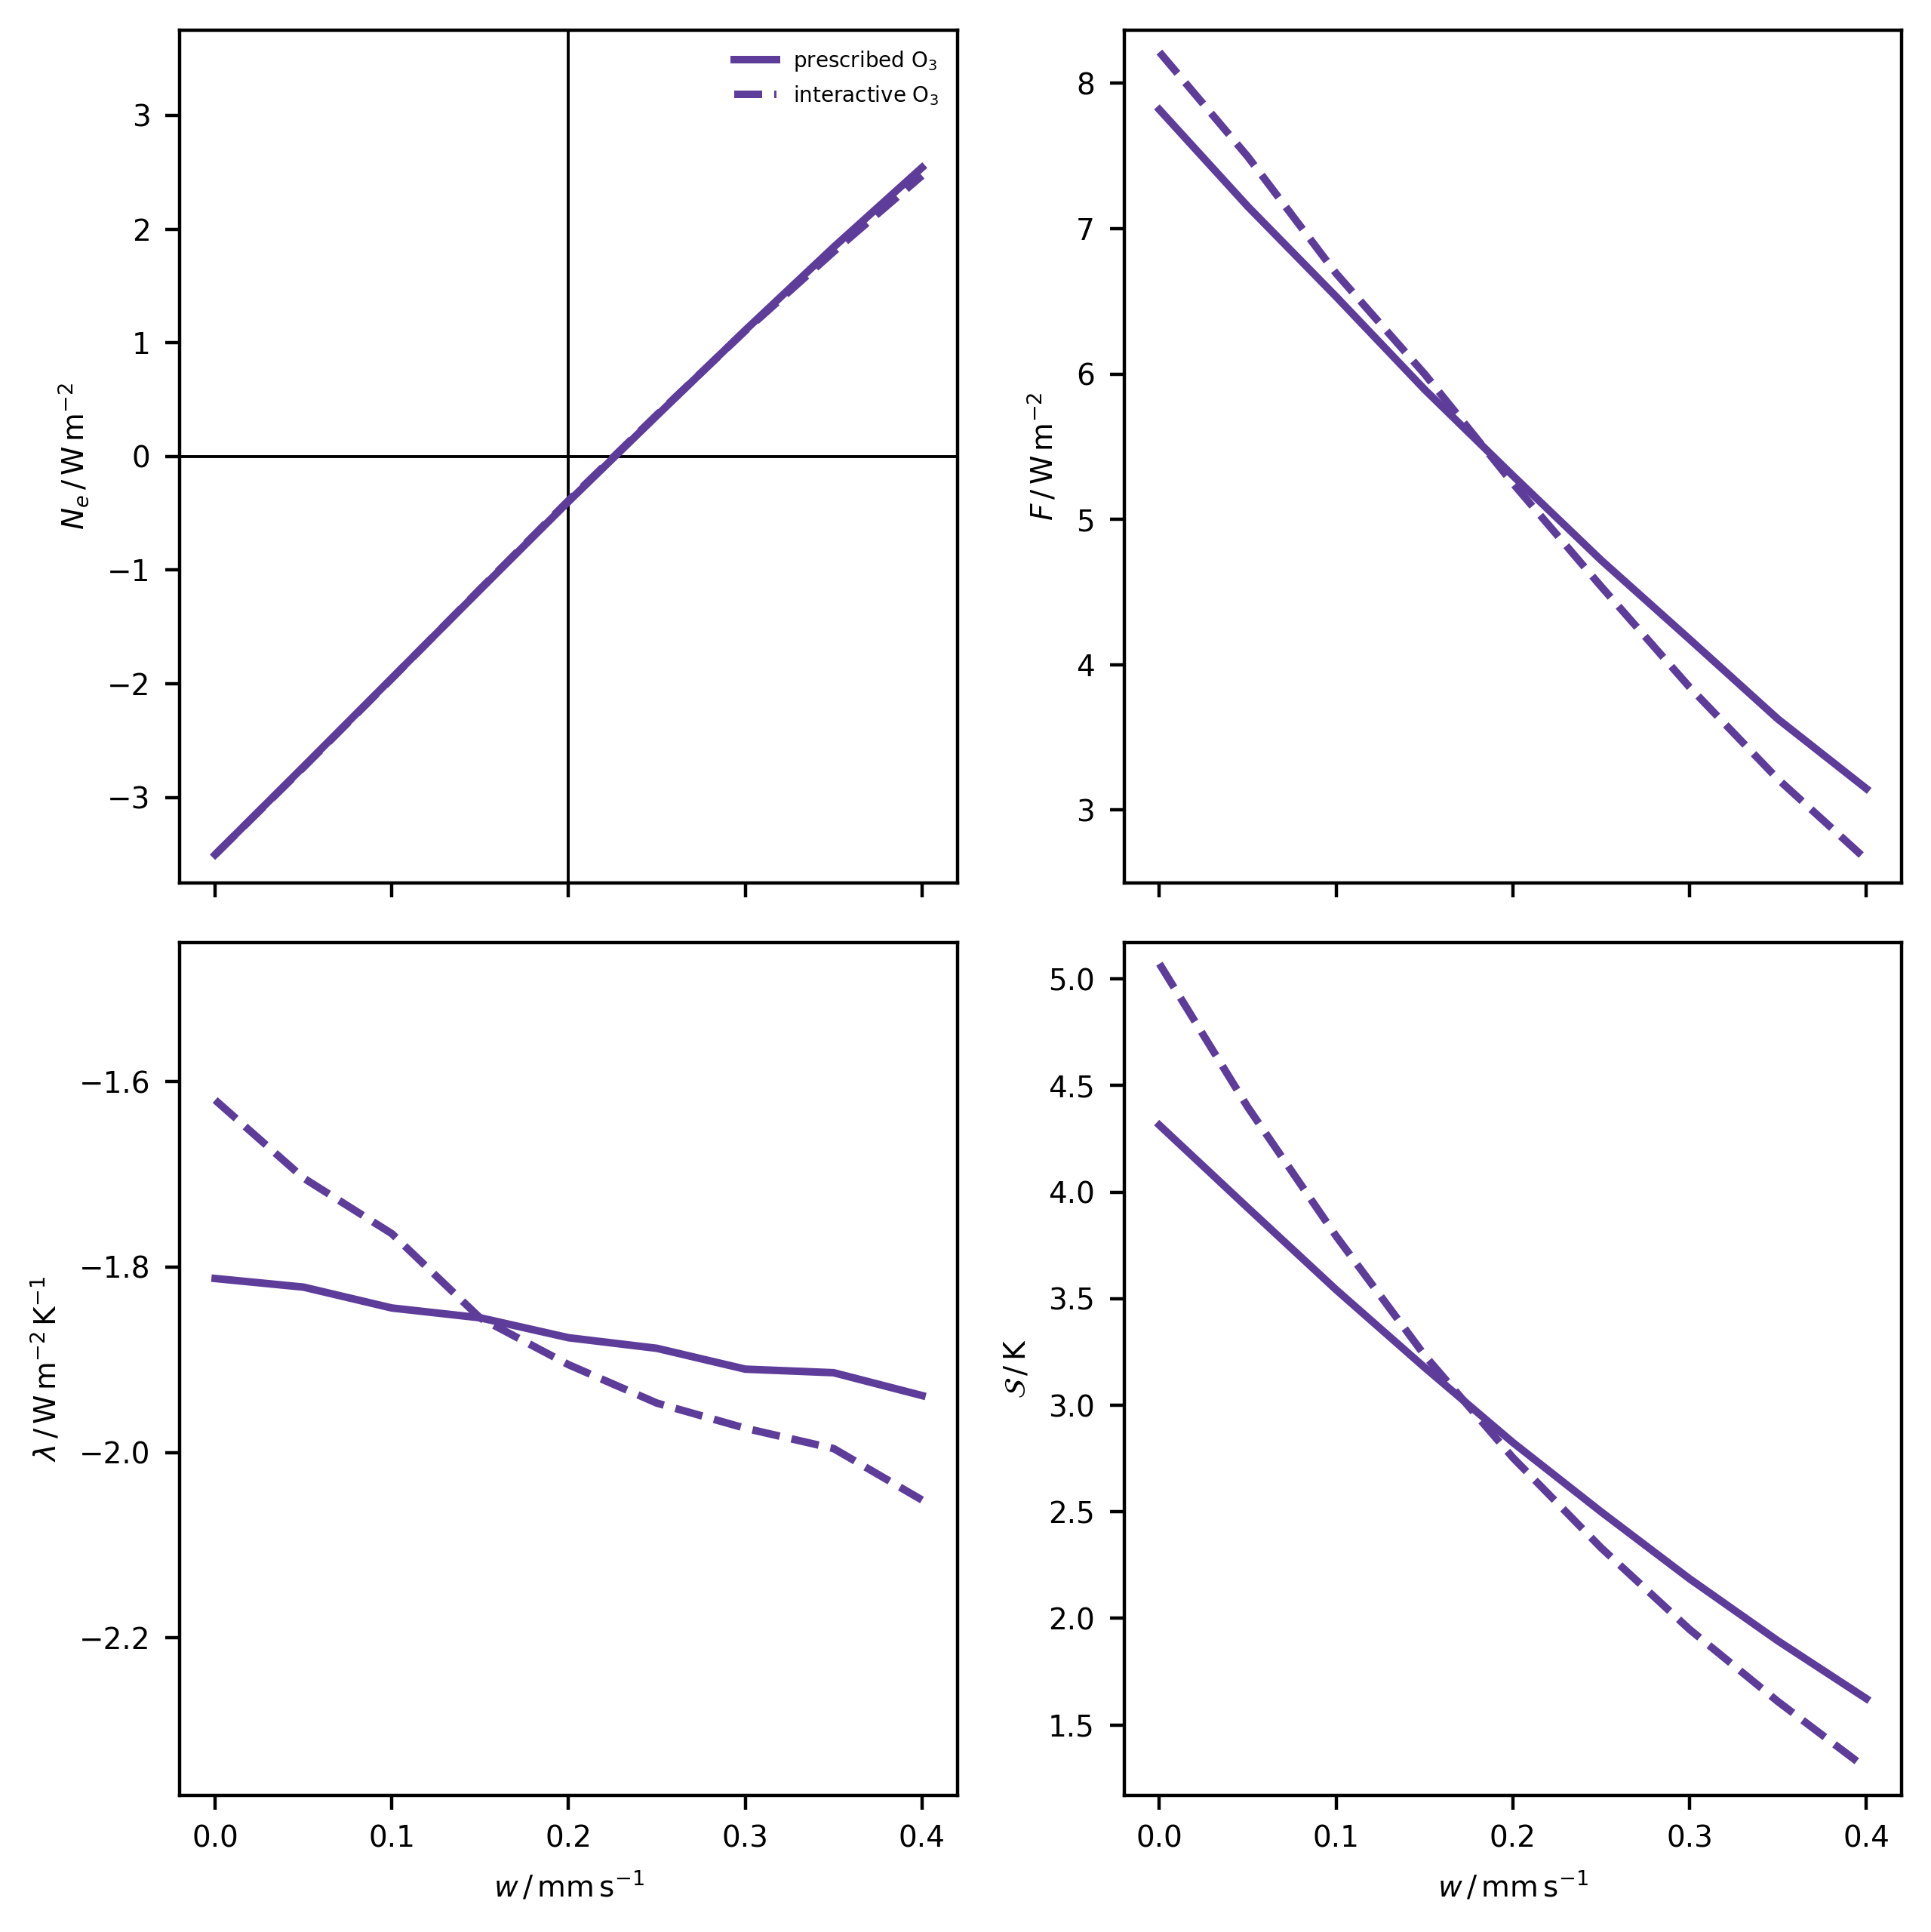

In [4]:
fig, axes, data = upwkonrad.diagrams_vw(
    variables=["N_f", "F_eff,f", "λ", "S"],
    experiment="2xCO2",
    RHs=[0.4],
    O3s=["f", "a"],
    ws=[
        0.000, 0.050,
        0.100, 0.150,
        0.200, 0.250,
        0.300, 0.350,
        0.400,
    ],
    filename="fig02.pdf",
    ylabels=[
        "$N_{e}\,/\,\mathrm{W}\,\mathrm{m}^{-2}$",
        "$F\,/\,\mathrm{W}\,\mathrm{m}^{-2}$",
        "$\lambda\,/\,\mathrm{W}\,\mathrm{m}^{-2}\,\mathrm{K}^{-1}$",
        "$\mathcal{S}\,/\,\mathrm{K}$",
    ],
    limits=[
        (-3.75, 3.75),
        (2.5, 8.365),
        (-2.37, -1.45),
        (1.17, 5.17),
    ],
    columns=2,
    save=True,
    close=False,
    labels=True,
    labelRH=False,
    labelsO3=[
        r"prescribed O$_{3}$",
        r"interactive O$_{3}$"
    ],
    base=base
)

del data

# FIGURE 3. Profiles of $T$, $\Gamma$, $q$ and $r_{v,\mathrm{O}_{3}}$ for prescribed O$_{3}$ and instantaneous change in upwelling

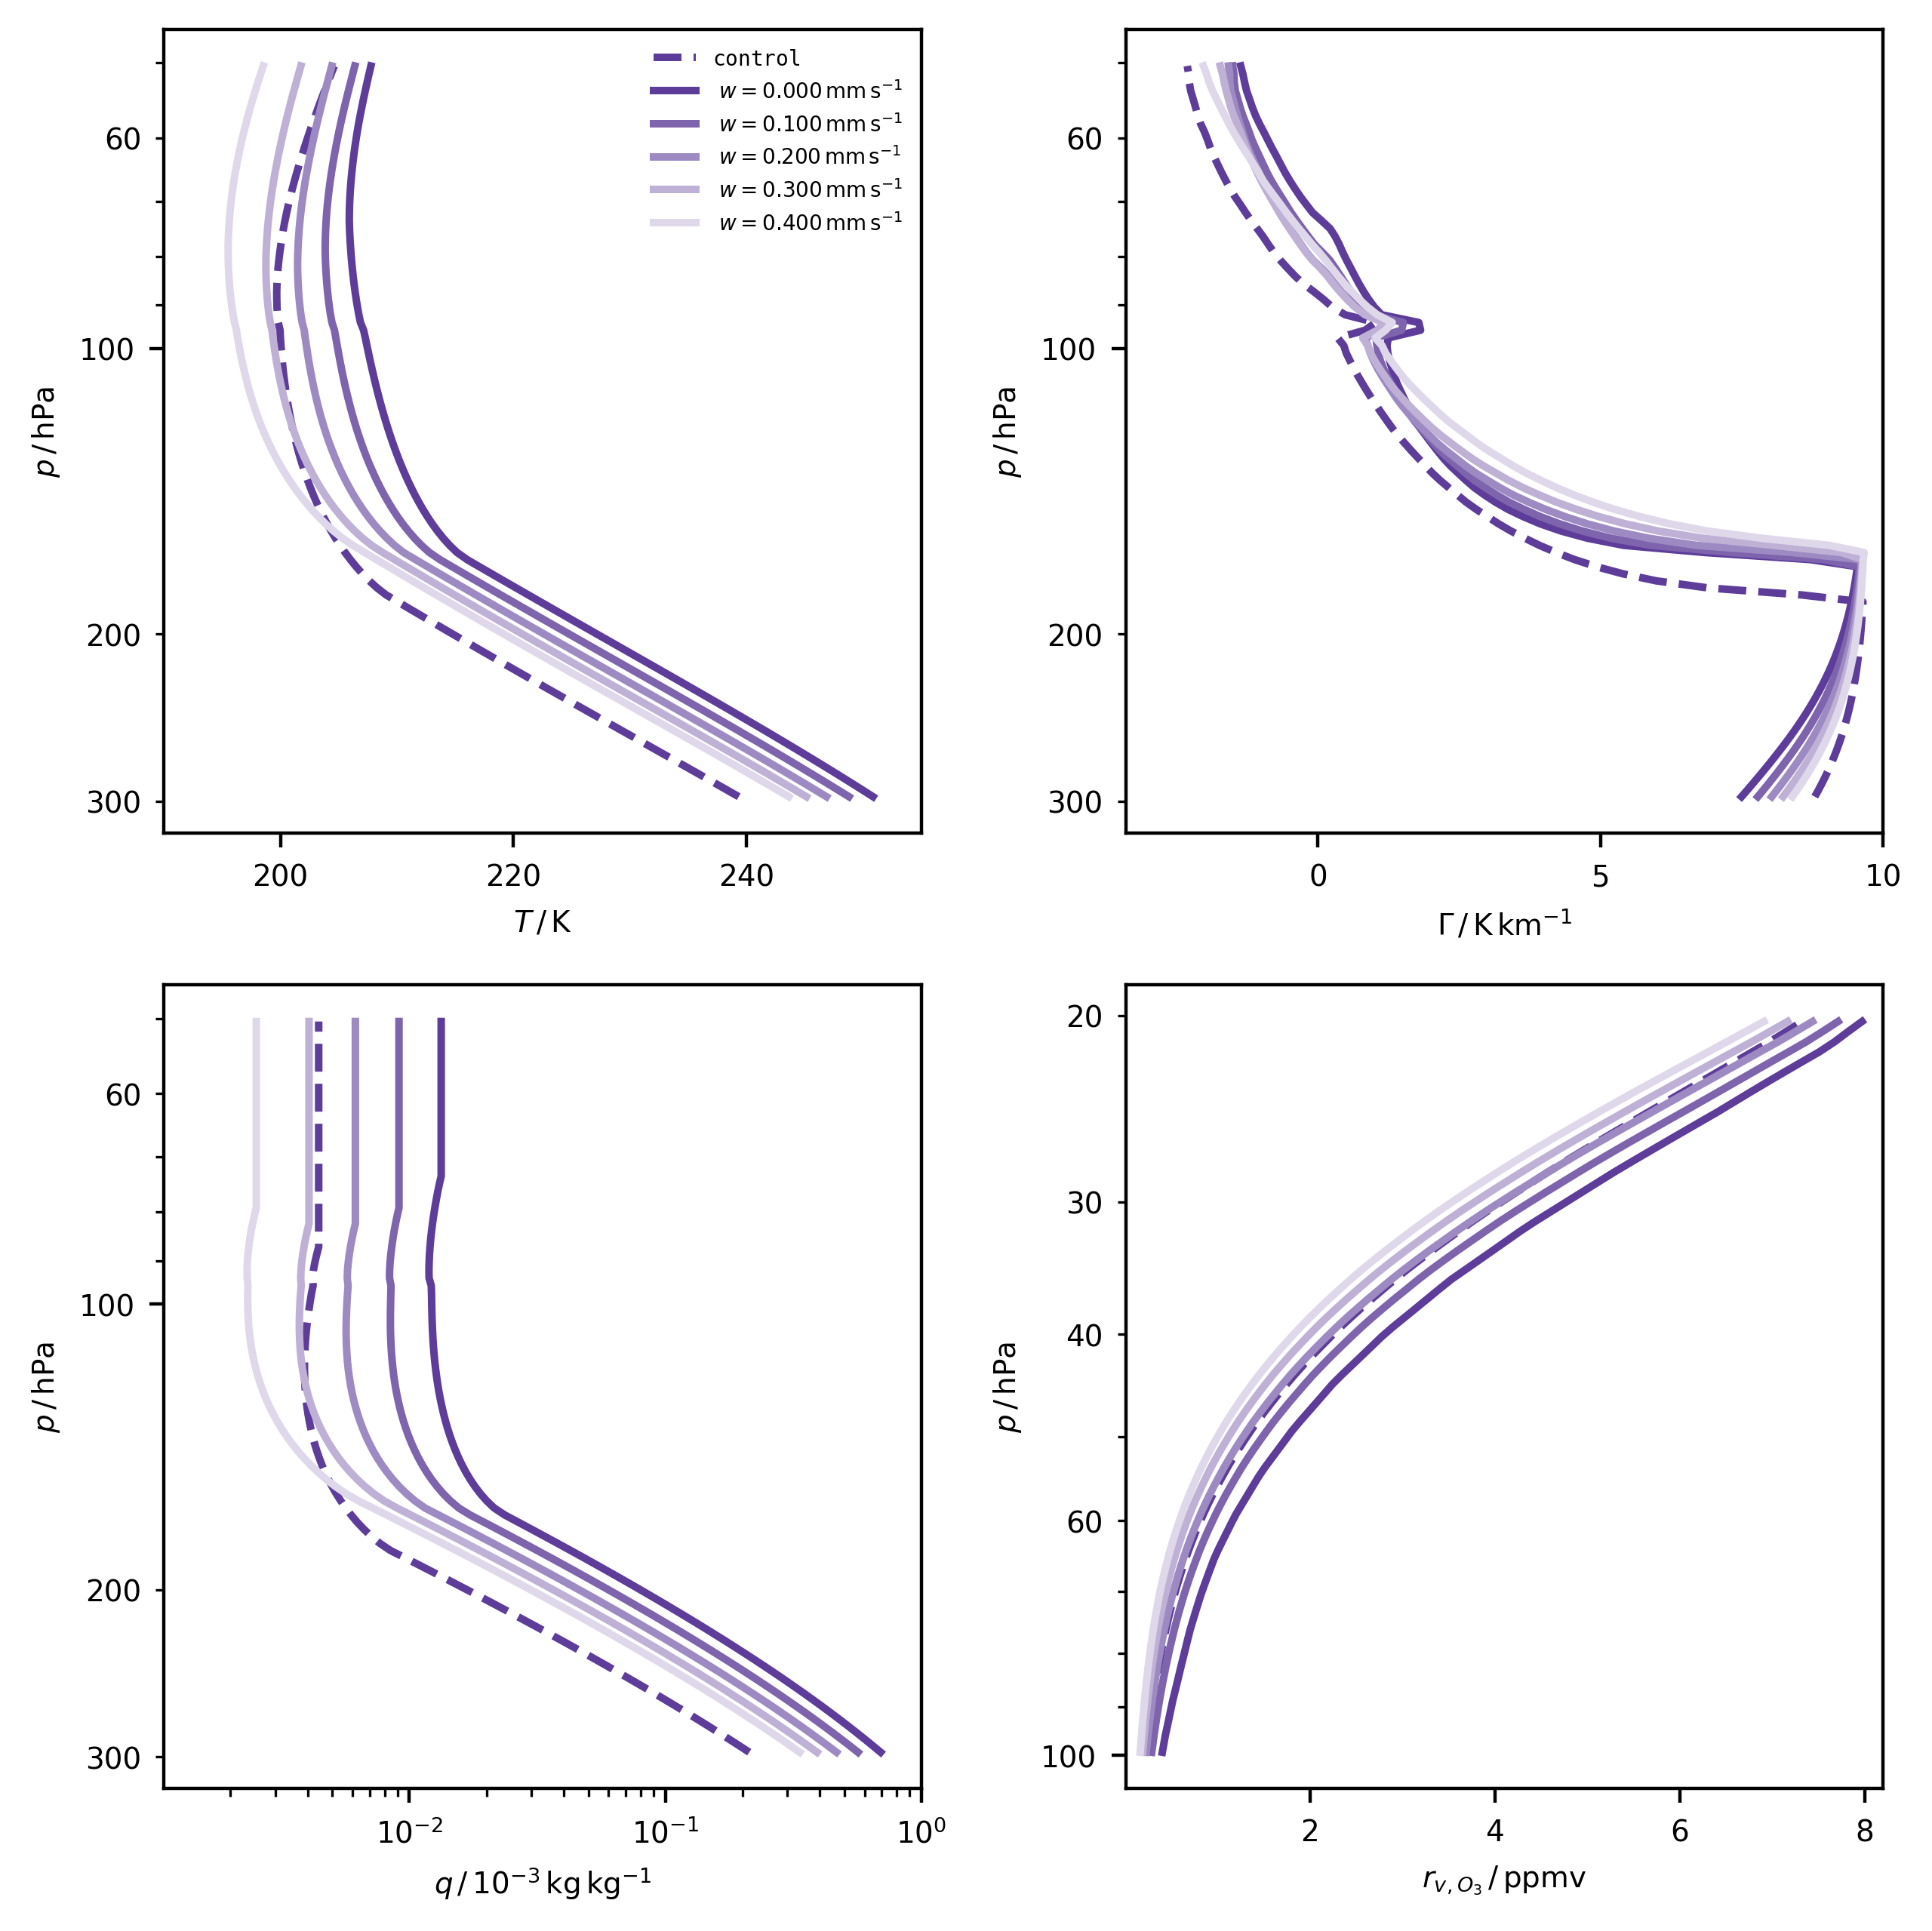

In [5]:
variables = {
    "T": {
        0.4: {
            "f": [0.0, 0.1, 0.2, 0.3, 0.4],
        },
    },
    "Γ": {
        0.4: {
            "f": [0.0, 0.1, 0.2, 0.3, 0.4],
        },
    },
    "q": {
        0.4: {
            "f": [0.0, 0.1, 0.2, 0.3, 0.4],
        },
    },
#     "q_O3": {
#         0.4: {
#             "a": [0.0, 0.1, 0.2, 0.3, 0.4],
#         },
#     },
    "rv_O3": {
        0.4: {
            "a": [0.0, 0.1, 0.2, 0.3, 0.4],
        },
    },
}

xlabels = {
    "T": "$T\,/\,\mathrm{K}$",
    "Γ": "$\Gamma\,/\,\mathrm{K}\,\mathrm{km}^{-1}$",
    "q": "$q\,/\,10^{-3}\,\mathrm{kg}\,\mathrm{kg}^{-1}$",
    "q_O3": "$q_{O_{3}}\,/\,10^{-6}\,\mathrm{kg}\,\mathrm{kg}^{-1}$",
    "rv_O3": "$r_{v,O_{3}}\,/\,\mathrm{ppmv}$",
}
labelsO3 = {
    "f": r"",
    "a": r"",
}

limits = {
    "T": (190, 255),
    "Γ": (-3.4, 10),
    "q": (1.1e-3, 1),
    "q_O3": (1e-2, 13.5),
    "rv_O3": (1e-2, 8.2),
}

labels = [
    True, False, False, False
]

fig, axes, data = upwkonrad.profiles_doubling(
    variables=variables,
    experiment="2xCO2",
    filename="fig03.pdf",
    xlabels=xlabels,
    limits=limits,
    columns=2,
    save=True,
    close=False,
    labels=labels,
    labelRH=False,
    labelsO3=labelsO3,
    ifleft=False,
    base=base,
)

del data

# FIGURE 4. N$_{e}$, F, λ and $\mathcal{s}$ vs $w_{e}$ diagrams for U4 and evolving upwelling

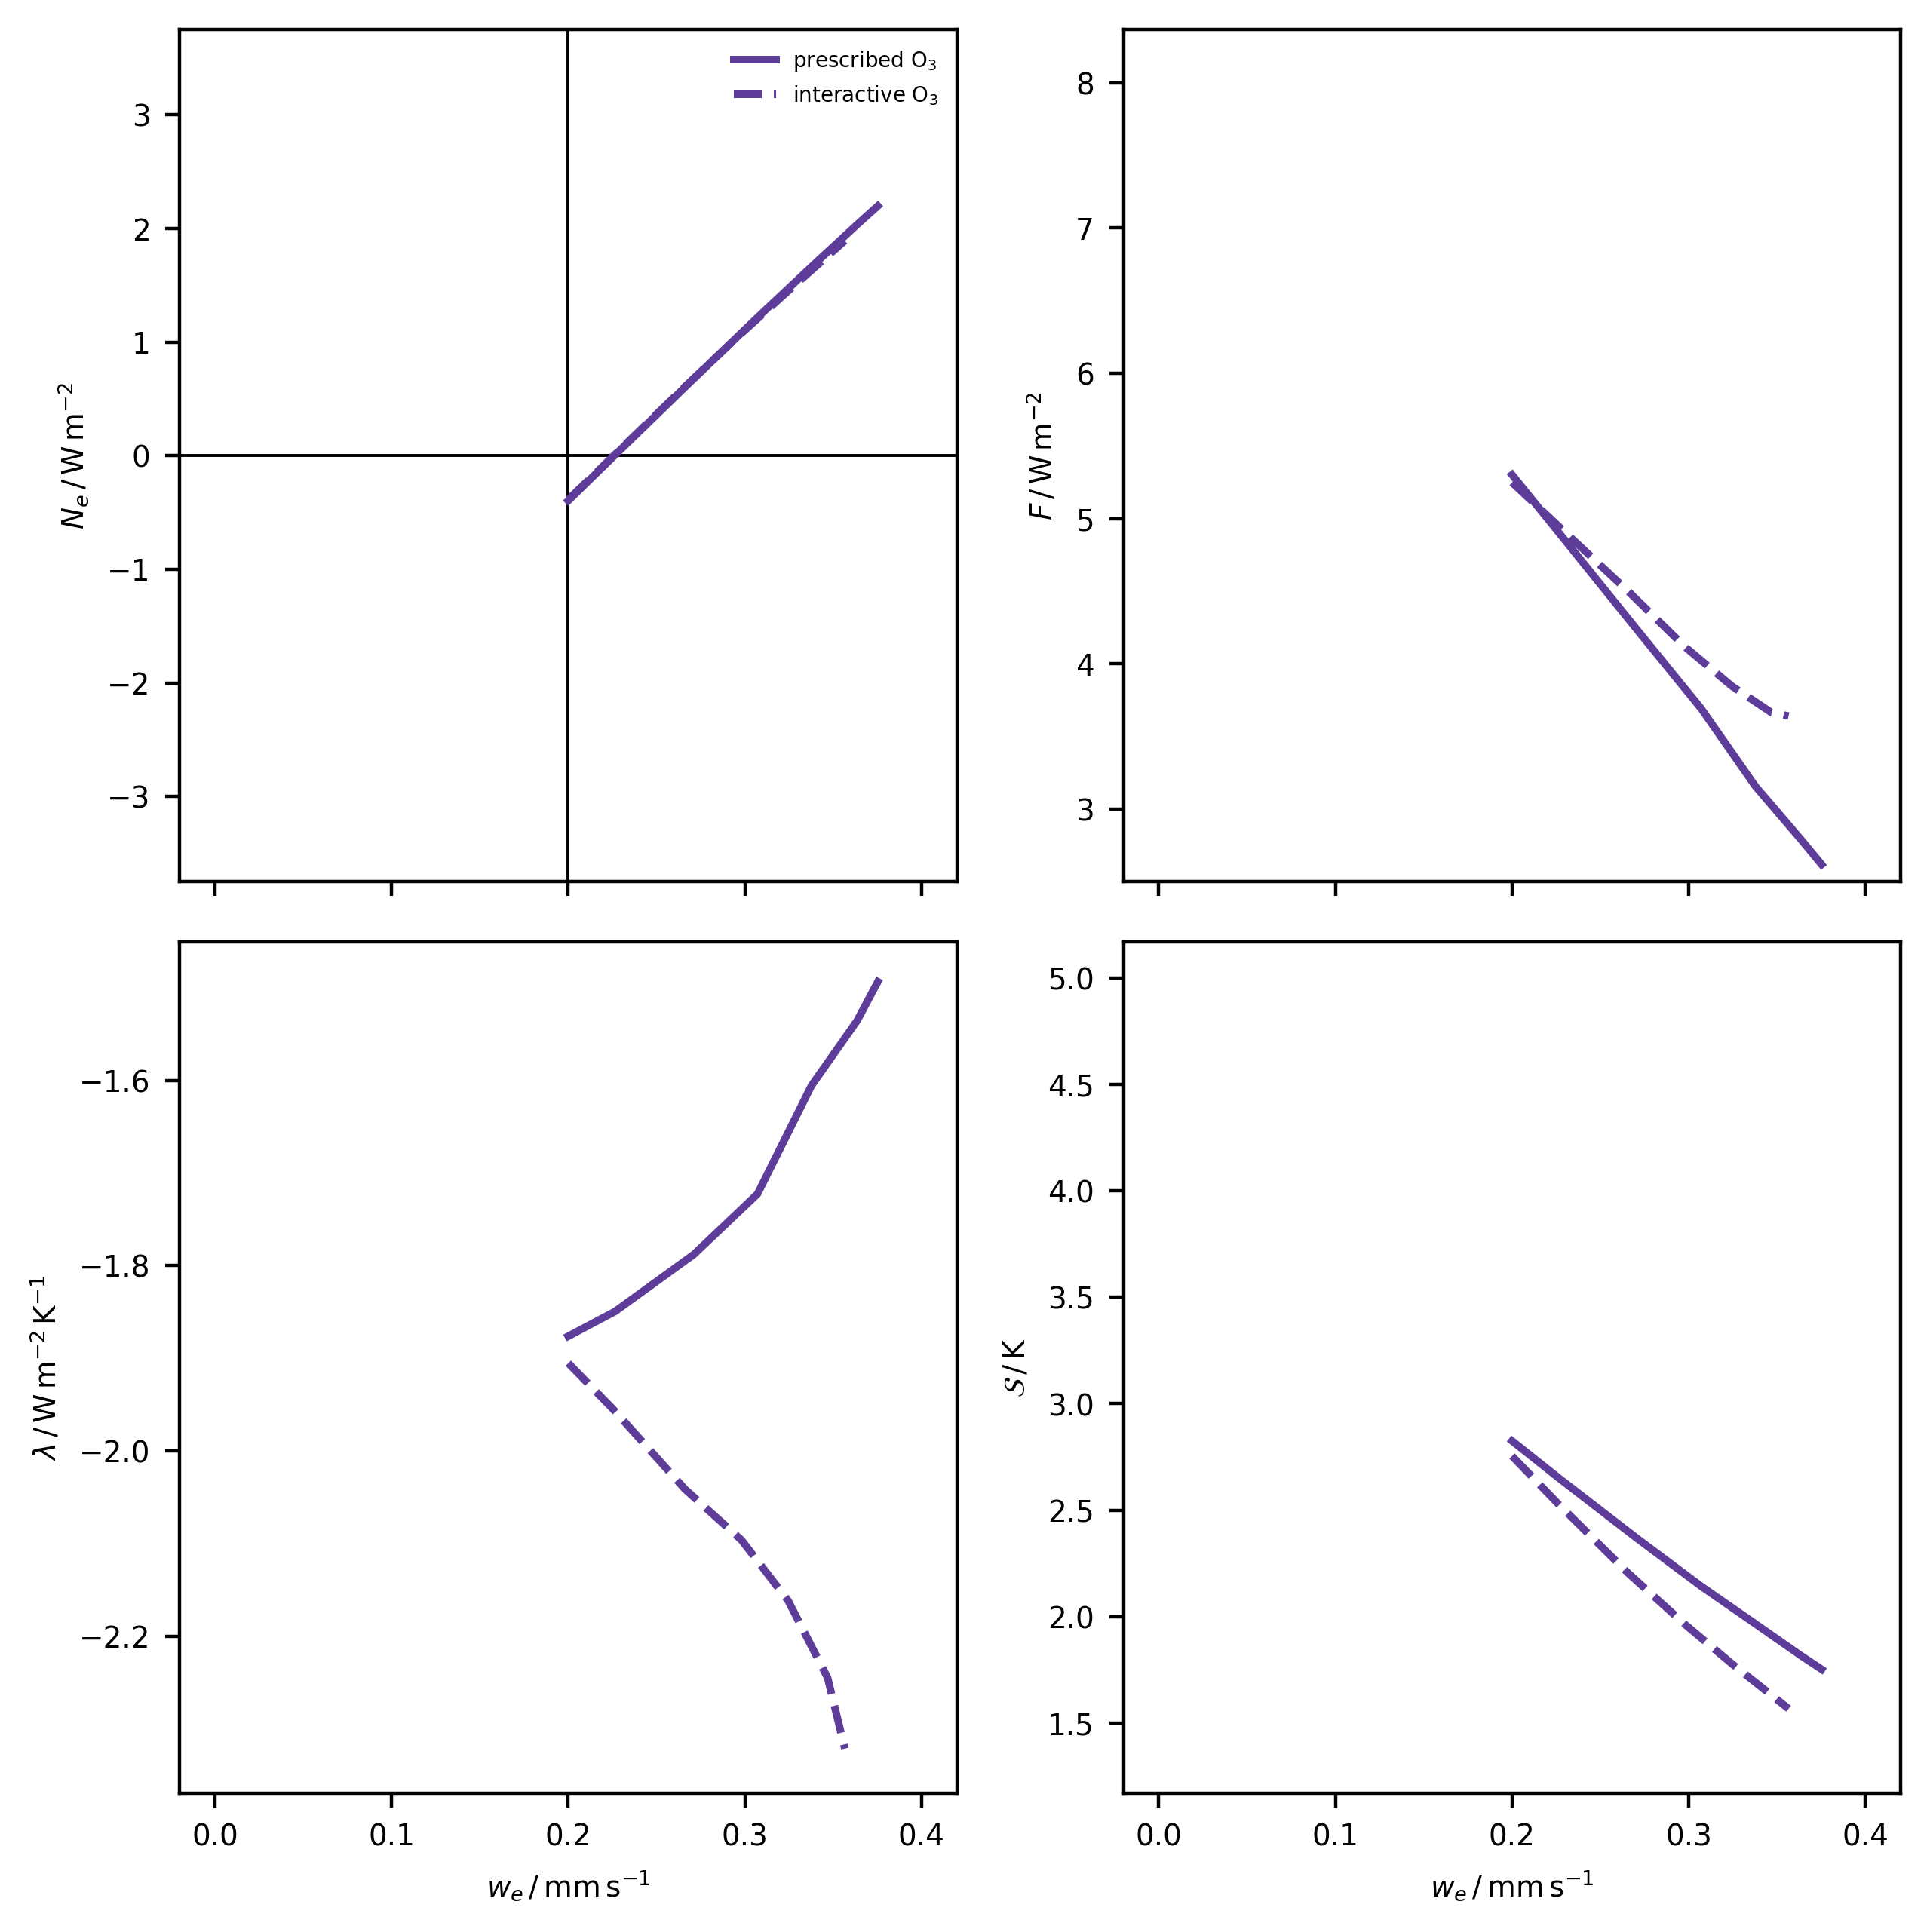

In [6]:
fig, axes, data = upwkonrad.diagrams_vw(
    variables=["N_f", "F_eff,f", "λ", "S"],
    experiment="2xCO2",
    RHs=[0.4],
    O3s=["f", "a"],
    ws=[0.200, "p01", "p03", "p05", "p07", "p09", "p10",],
    filename="fig04.pdf",
    ylabels=[
        "$N_{e}\,/\,\mathrm{W}\,\mathrm{m}^{-2}$",
        "$F\,/\,\mathrm{W}\,\mathrm{m}^{-2}$",
        "$\lambda\,/\,\mathrm{W}\,\mathrm{m}^{-2}\,\mathrm{K}^{-1}$",
        "$\mathcal{S}\,/\,\mathrm{K}$",
    ],
    limits=[
        (-3.75, 3.75),
        (2.5, 8.365),
        (-2.37, -1.45),
        (1.17, 5.17),
    ],
    columns=2,
    save=True,
    close=False,
    labels=True,
    labelRH=False,
    labelsO3=[
        r"prescribed O$_{3}$",
        r"interactive O$_{3}$"
    ],
    base=base
)

del data

for variable in ["λ", "S"]:
    axes[variable].set_xlabel(
        "$w_{e}\,/\,\mathrm{mm}\,\mathrm{s}^{-1}$", fontsize=7
    )

fig.savefig("fig04.pdf", bbox_inches="tight")

# FIGURE 5. NT-diagrams for U4 with prescribed O$_{3}$ and evolving upwelling

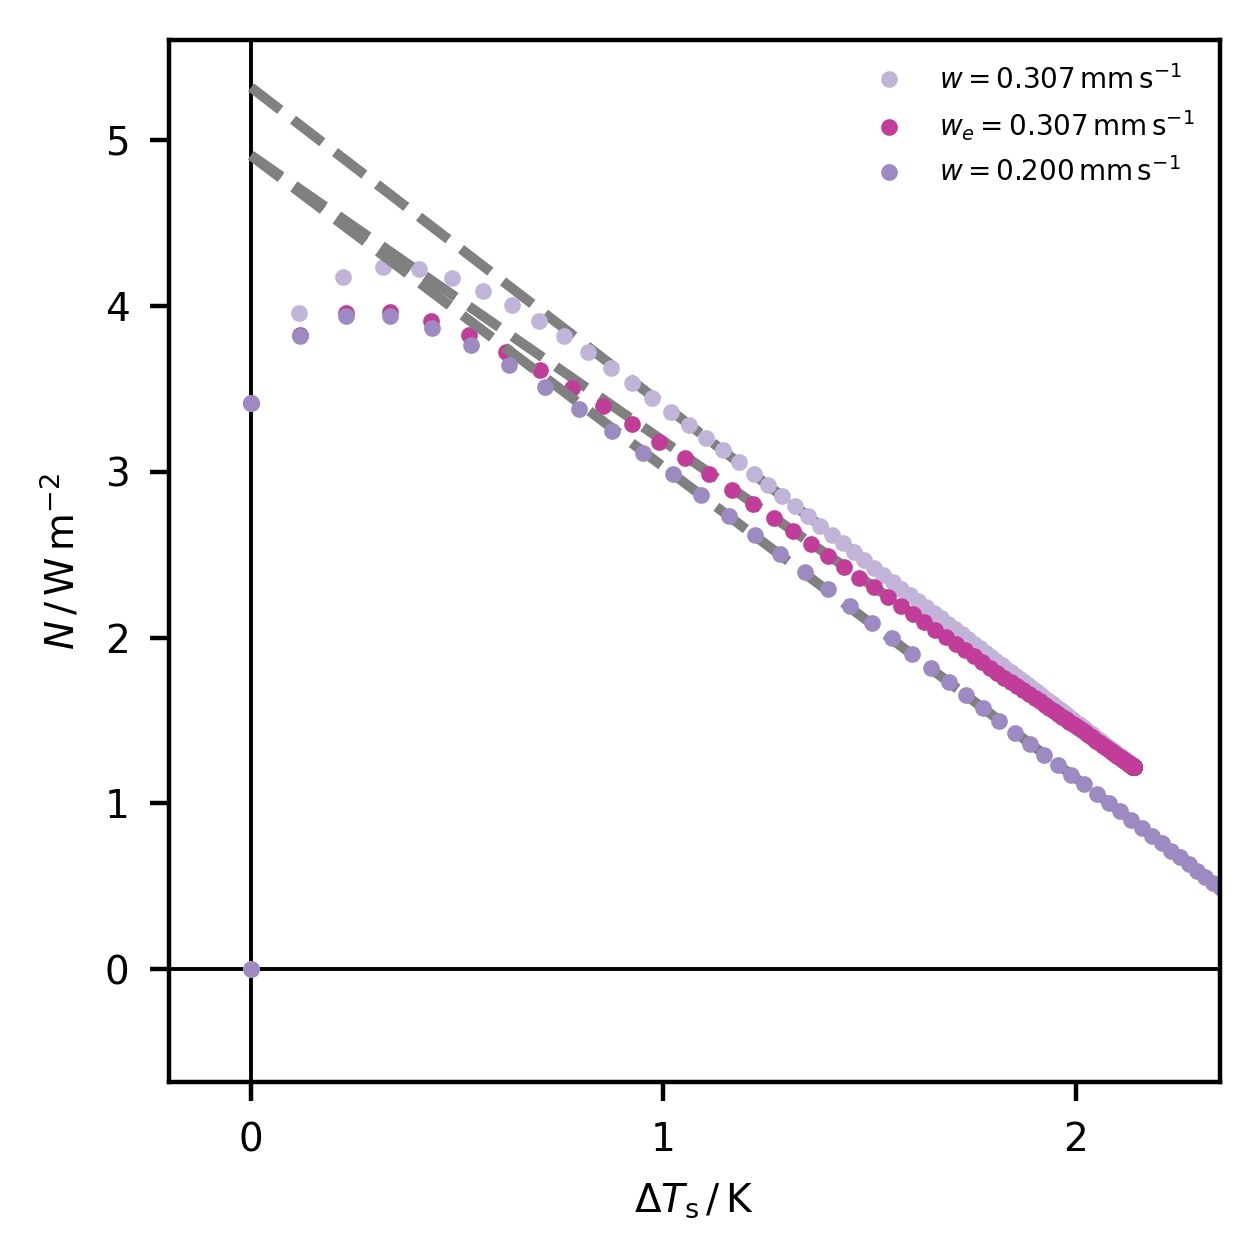

In [7]:
fig, axes, data = upwkonrad.diagram_NT(
    e="2xCO2",
    RH=0.4,
    O3="f",
    ws=["p11", "p05", 0.200],
    fname="fig05.pdf",
    lims=(-0.2, 2.35),
    save=True,
    close=False,
    picontrol=True,
    labels=True,
    base=base,
)

del data

color = upwkonrad.clima.np.array([194, 60, 153]) / 255
axes.lines[7].set_color(tuple(color))
handles, labels = axes.get_legend_handles_labels()
handles[1].set_color(tuple(color))
labels[0] = labels[0][0:2] + labels[0][6:]
axes.legend(handles, labels, frameon=False, fancybox=False, fontsize=5)

fig.savefig("fig05.pdf", bbox_inches="tight")

# TABLE 3. O$_{3}$ concentrations in CCMs and `konrad` with Cariolle O$_{3}$

In [8]:
table = upwkonrad.table_O3_comparison(
    experiment="2xCO2",
    RH=0.4,
    ws=[0.2, "p05", 0.3, "p10", 0.4,],
    base=base,
)
print(table)

\begin{tabular}{@{}rS[table-format=1.2]S[table-format=1.2]cS[table-format=1.2]S[table-format=1.2]cS[table-format=1.2]S[table-format=1.2]@{}}
    \toprule
      &\multicolumn{8}{c}{O$_{3}$ concentration$\,/\,\mathrm{ppmv}$}\\
    \cmidrule{2-9}
    \multirow{2}{*}{Model} &\multicolumn{2}{c}{\SI{30}{\hecto\Pa}} & &\multicolumn{2}{c}{\SI{50}{\hecto\Pa}} & &\multicolumn{2}{c}{$\Delta$}\\
     \cmidrule{2-3}\cmidrule{5-6}\cmidrule{8-9}
      &\texttt{nxCO2} &\texttt{control} & &\texttt{nxCO2} &\texttt{control} & &\SI{30}{\hecto\Pa} &\SI{50}{\hecto\Pa}\\
      \midrule
      Dietmüller &4.50 &5.00 & &0.90 &1.50 & &-0.50 &-0.60\\
      Nowack &3.90 &4.50 & &1.30 &1.80 & &-0.60 &-0.50\\
      Marsh &3.40 &3.90 & &1.00 &1.30 & &-0.50 &-0.30\\
    \midrule
      \texttt{2xCO2} $w = 0.200$ &3.90 &3.92 & &1.25 &1.29 & &-0.02 &-0.04\\
      \texttt{2xCO2} $w_{e} = 0.298$ &3.63 & & &1.10 & & &-0.28 &-0.19\\
      \texttt{2xCO2} $w = 0.300$ &3.63 & & &1.10 & & &-0.29 &-0.19\\
      \texttt{2xCO2} $w_

# FIGURE 6. S vs w diagram for all RH profiles with prescribed O3 and instantaneous upwelling

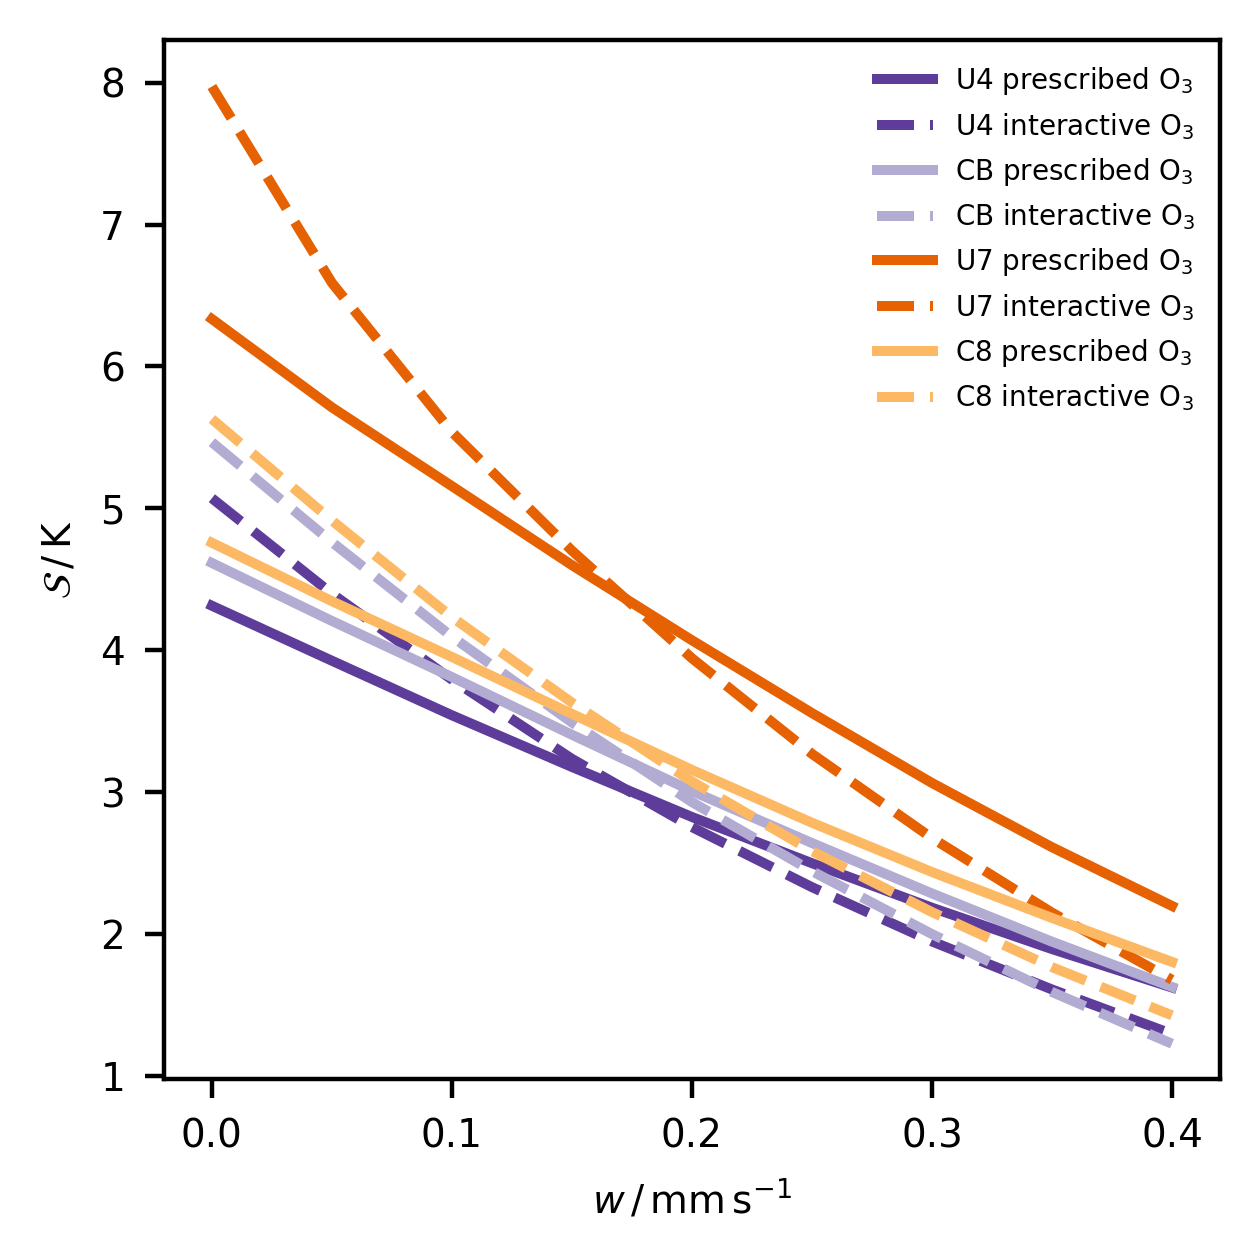

In [9]:
fig, axes, data = upwkonrad.diagrams_vw(
    variables=["S"],
    experiment="2xCO2",
    RHs=[0.4, 3.6, 0.7, 2.8],
    O3s=["f", "a"],
    ws=[
        0.000, 0.050,
        0.100, 0.150,
        0.200, 0.250,
        0.300, 0.350,
        0.400,
    ],
    filename="fig06.pdf",
    ylabels=["$\mathcal{S}\,/\,\mathrm{K}$"],
    limits=[(0.98, 8.3)],
    columns=1,
    save=True,
    close=False,
    labels=True,
    labelRH=True,
    labelsO3=[r"prescribed O$_{3}$",r"interactive O$_{3}$"],
    base=base,
)
del data

# FIGURE 1A. N$_{e}$, F, λ and $\mathcal{s}$ vs $w$ diagrams for U4, instantaneous upwelling change and evolving upwelling

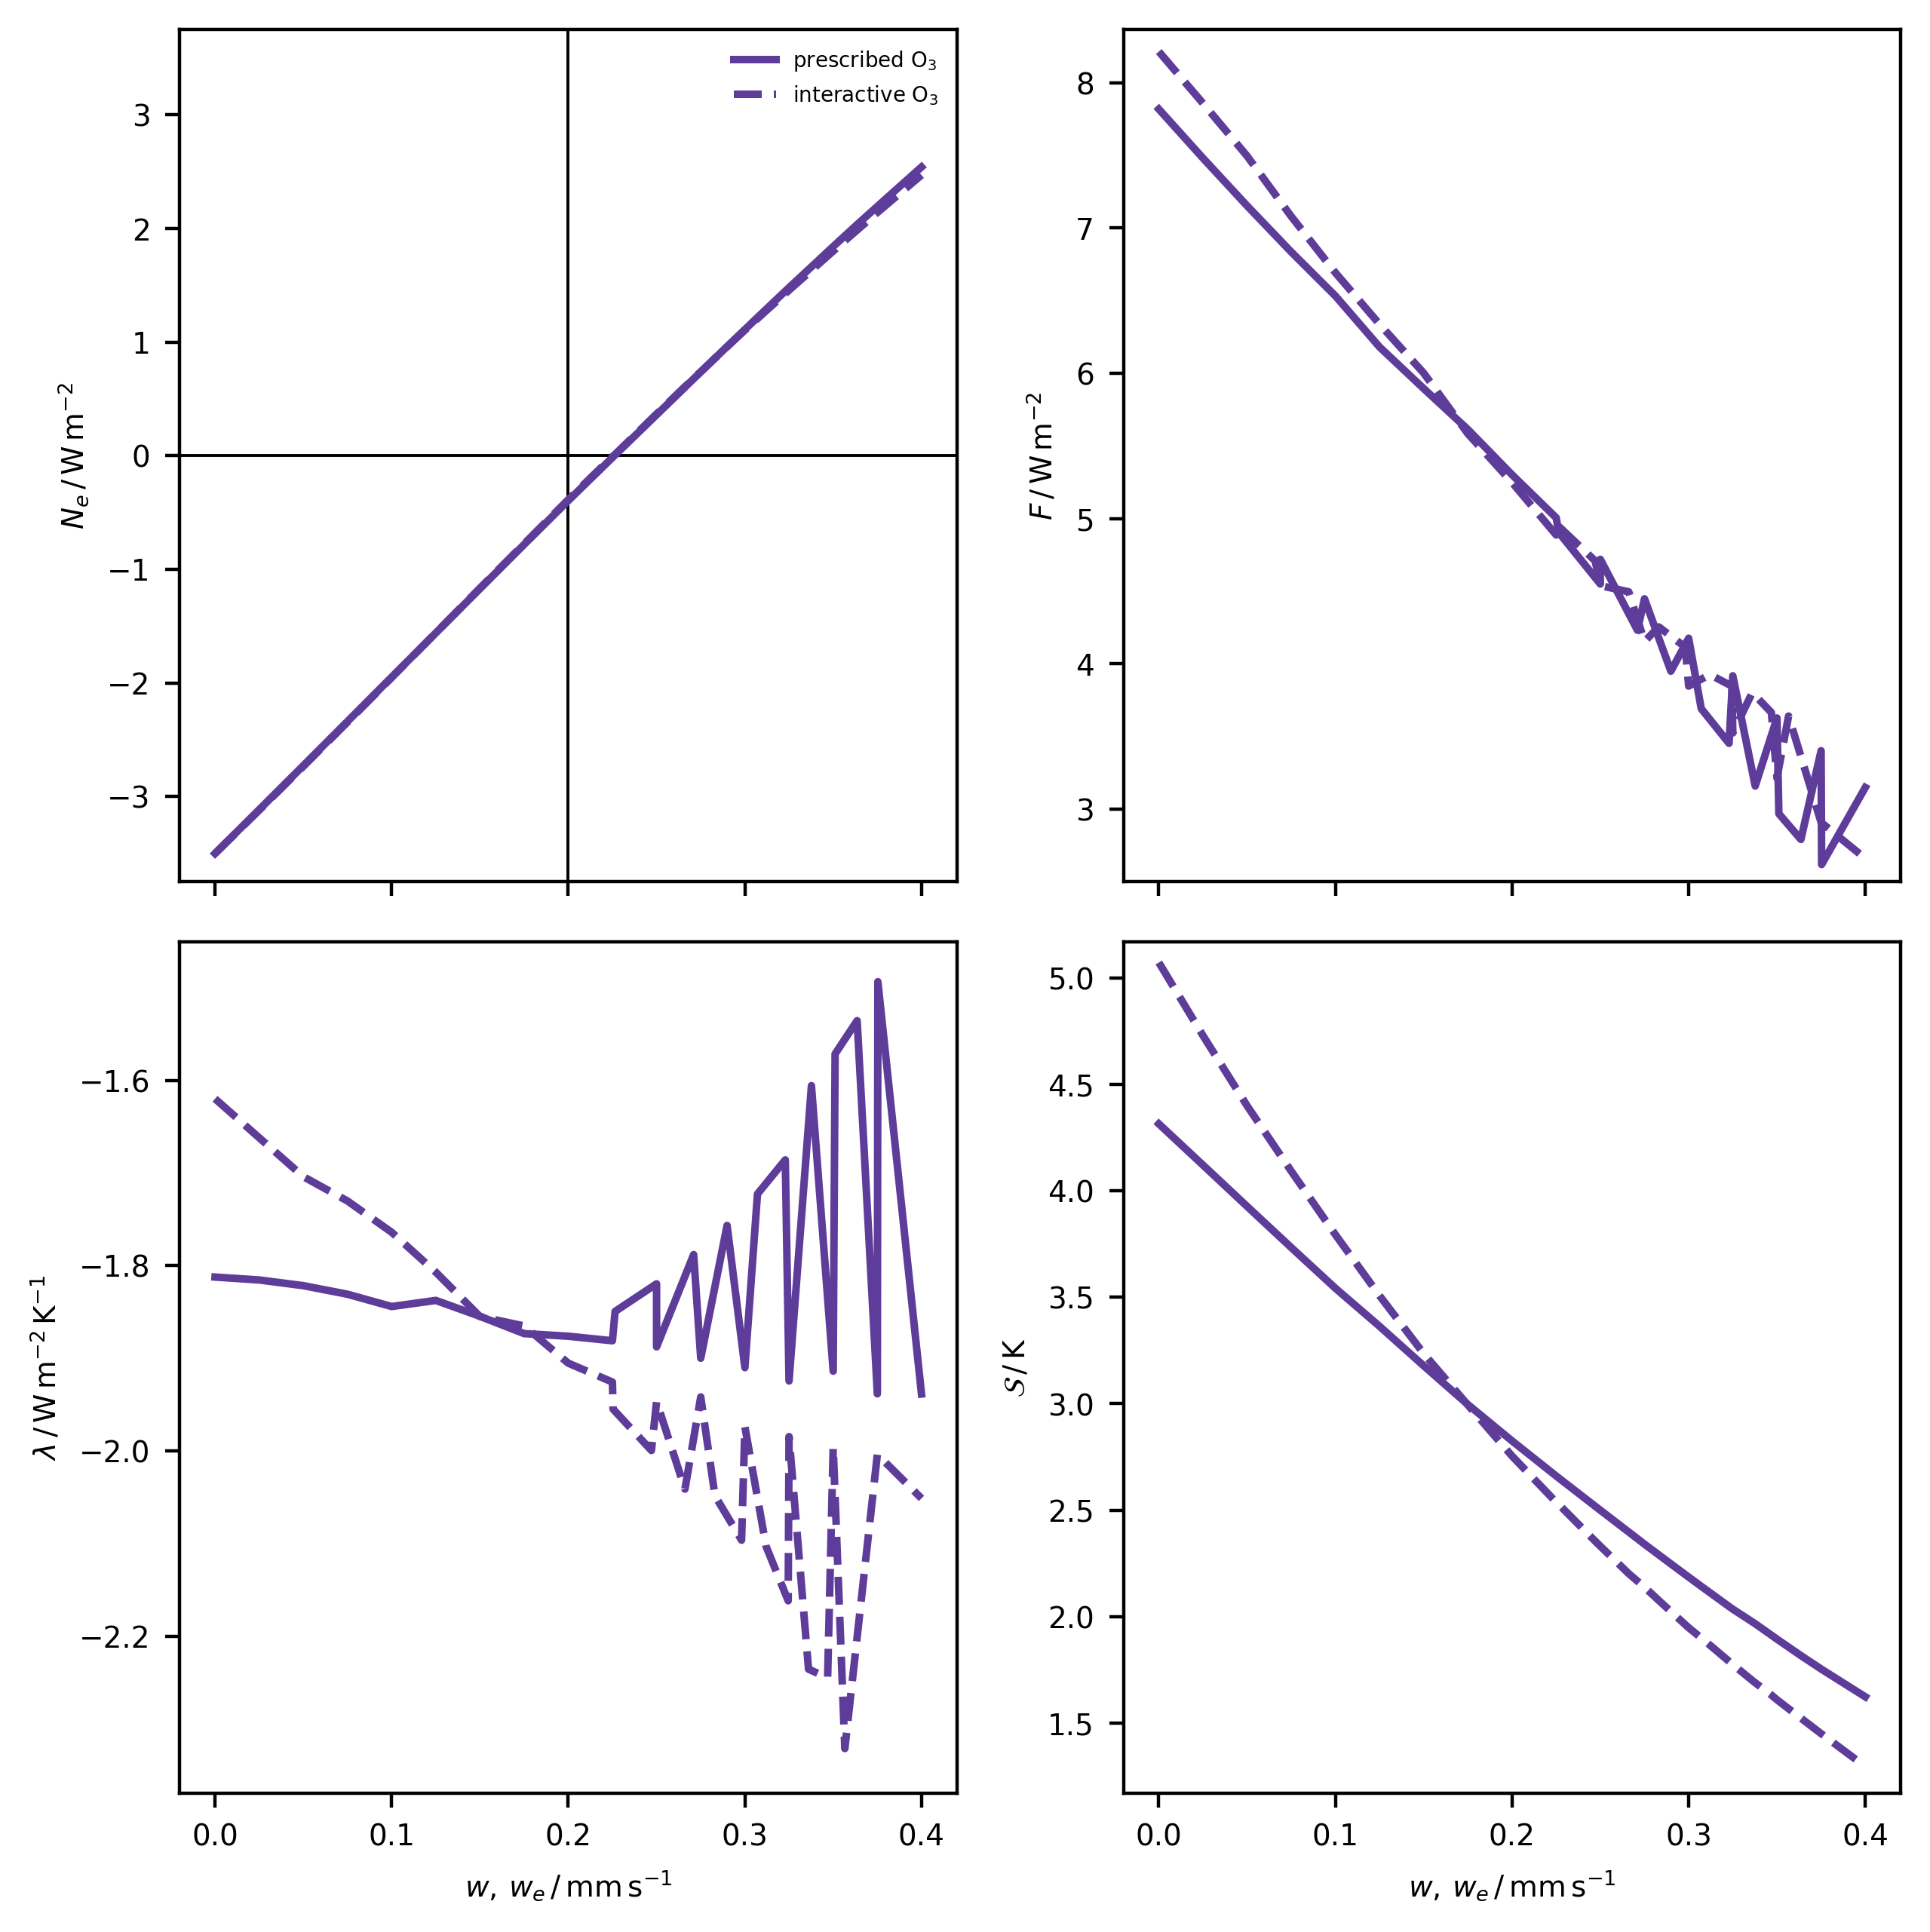

In [10]:
fig, axes, data = upwkonrad.diagrams_vw(
    variables=["N_f", "F_eff,f", "λ", "S"],
    experiment="2xCO2",
    RHs=[0.4],
    O3s=["f", "a"],
    ws=[0.000, 0.025, 0.050, 0.075,
        0.100, 0.125, 0.150, 0.175,
        0.200, 0.225, 0.250, 0.275,
        0.300, 0.325, 0.350, 0.375,
        0.4,
        "p01", "p03", "p05", "p07", "p09", "p10",
        "p02", "p04", "p06", "p08",
    ],
    filename="fig01A.pdf",
    ylabels=[
        "$N_{e}\,/\,\mathrm{W}\,\mathrm{m}^{-2}$",
        "$F\,/\,\mathrm{W}\,\mathrm{m}^{-2}$",
        "$\lambda\,/\,\mathrm{W}\,\mathrm{m}^{-2}\,\mathrm{K}^{-1}$",
        "$\mathcal{S}\,/\,\mathrm{K}$",
    ],
    limits=[
        (-3.75, 3.75),
        (2.5, 8.365),
        (-2.37, -1.45),
        (1.17, 5.17),
    ],
    columns=2,
    save=True,
    close=False,
    labels=True,
    labelRH=False,
    labelsO3=[
        r"prescribed O$_{3}$",
        r"interactive O$_{3}$"
    ],
    base=base
)

del data

for variable in ["λ", "S"]:
    axes[variable].set_xlabel(
        "$w,\,w_{e}\,/\,\mathrm{mm}\,\mathrm{s}^{-1}$", fontsize=7
    )

fig.savefig("fig01A.pdf", bbox_inches="tight")

# FIGURE 2A. Profiles of $T$, $\Gamma$, $q$ and $q_{\mathrm{O}_{3}}$ for Cariolle O$_{3}$

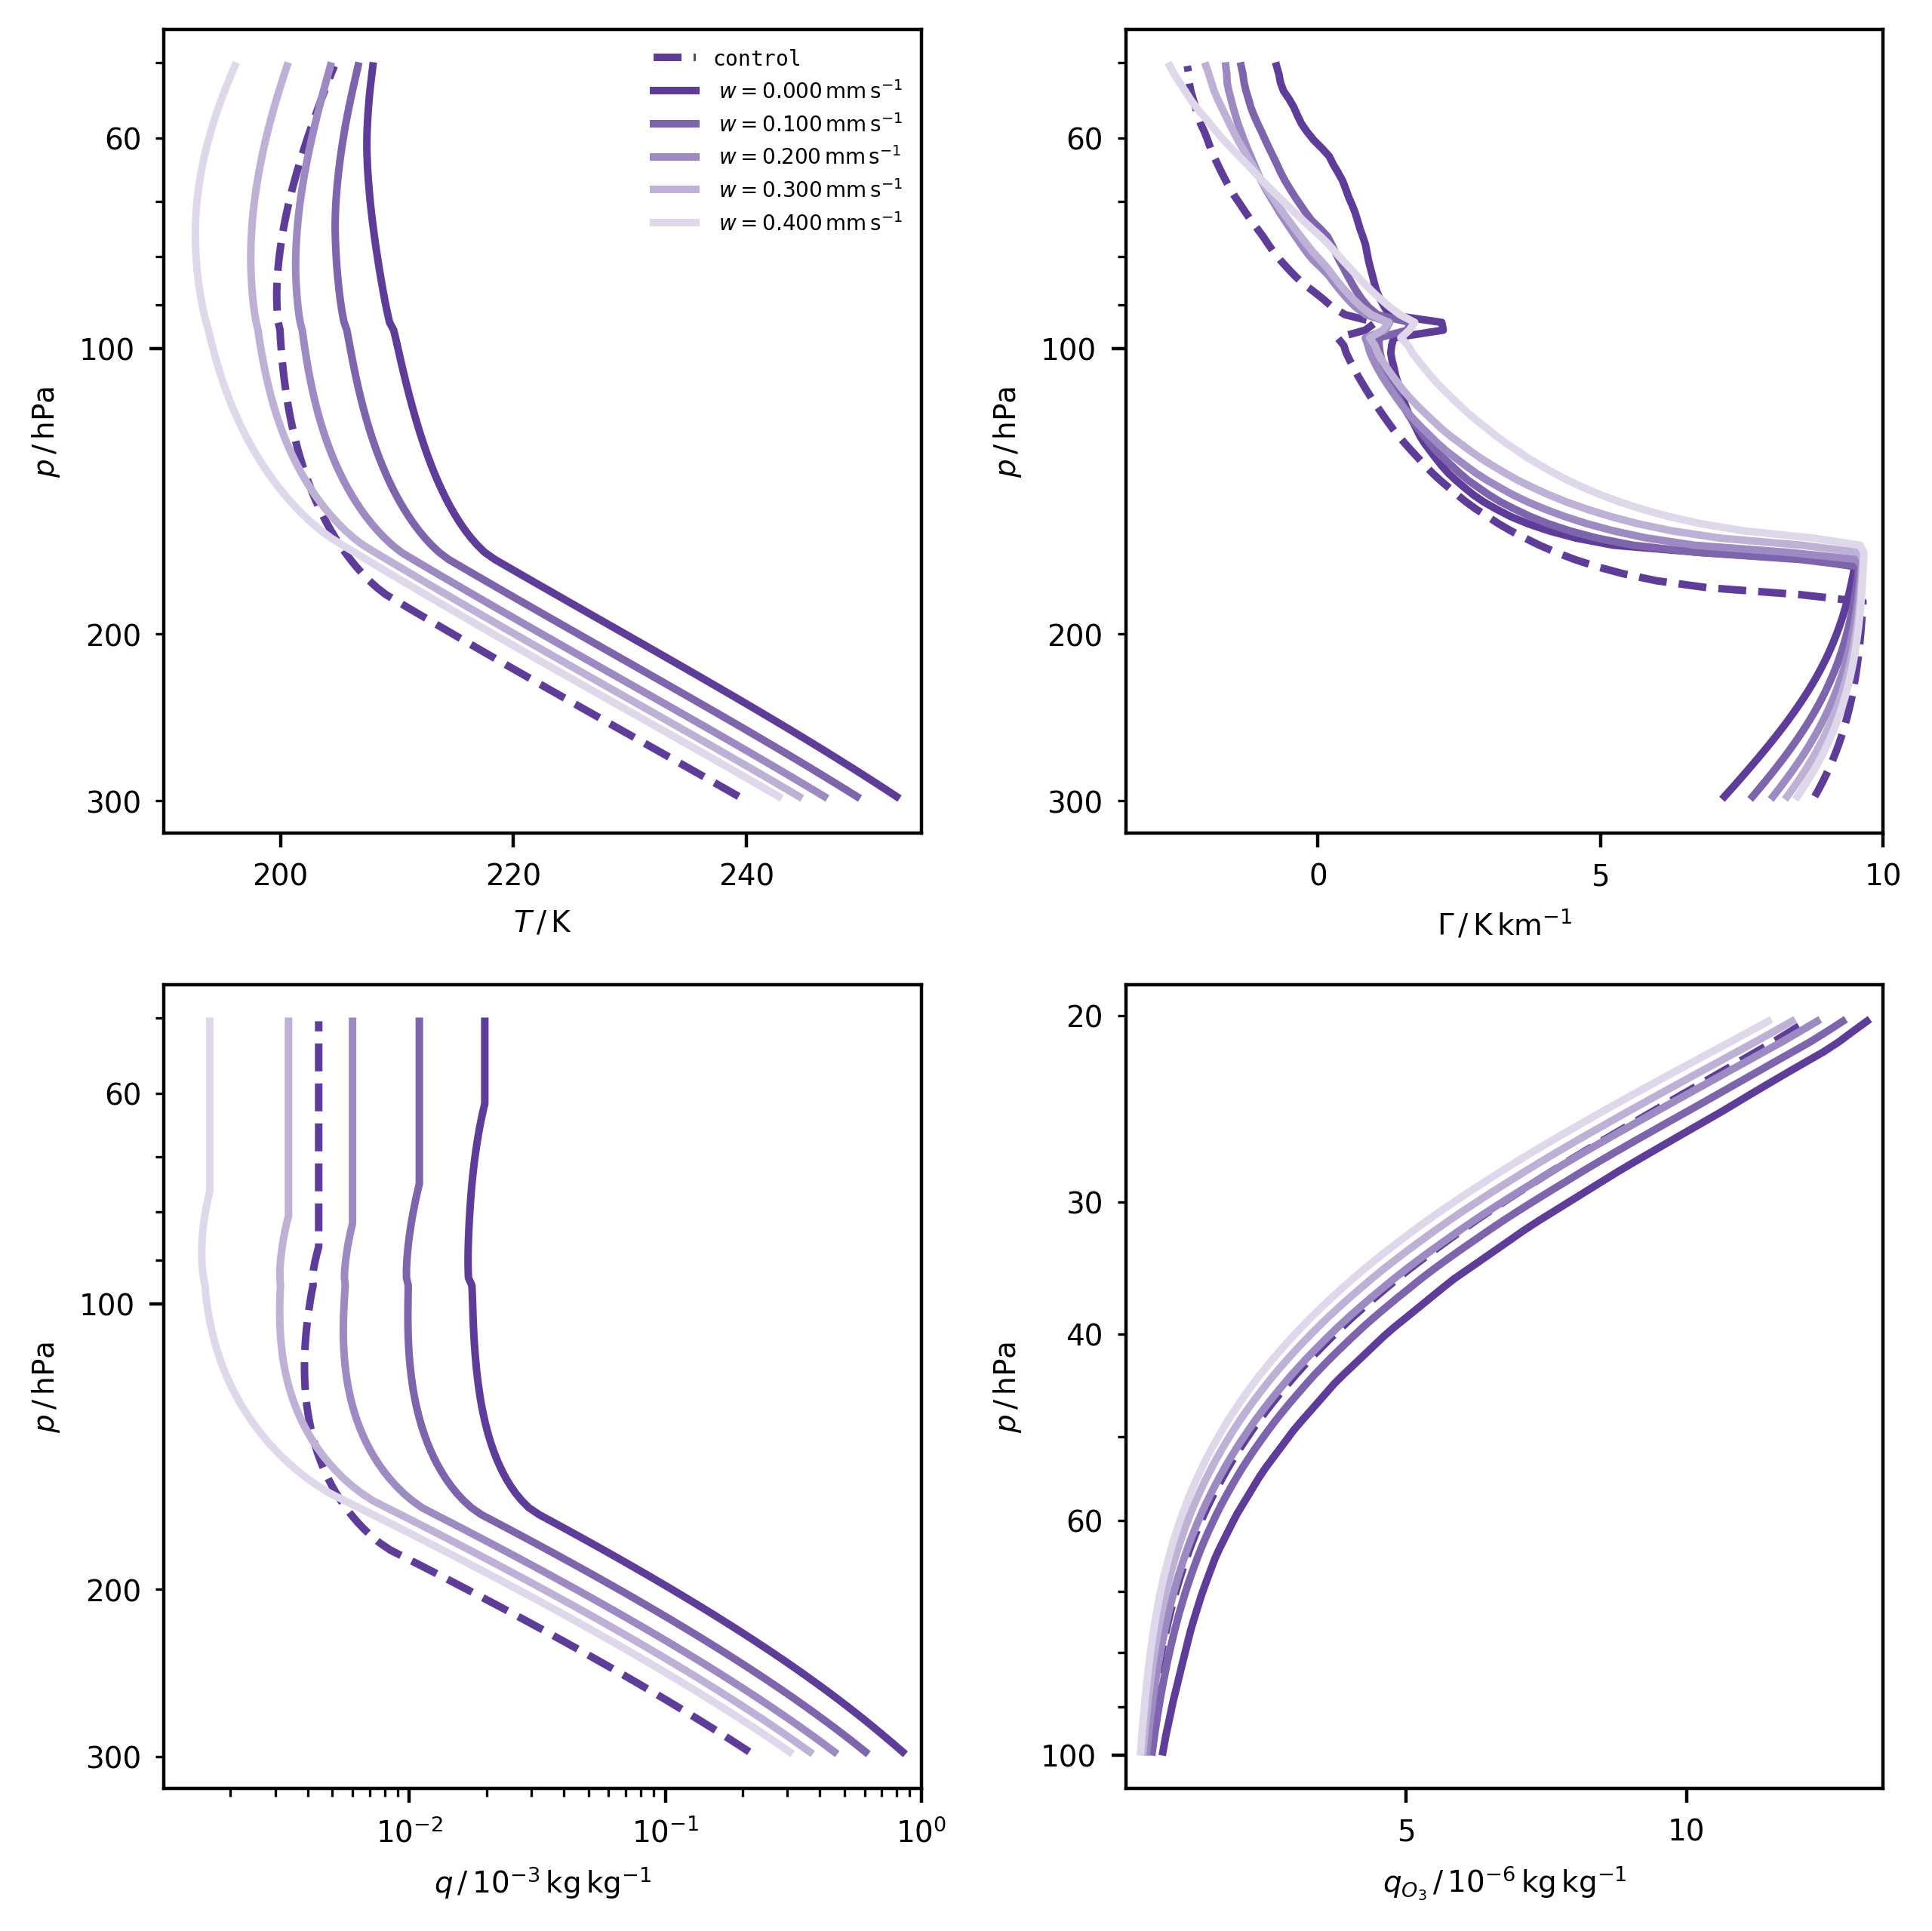

In [11]:
variables = {
    "T": {
        0.4: {
            "a": [0.0, 0.1, 0.2, 0.3, 0.4,],
        },
    },
    "Γ": {
        0.4: {
            "a": [0.0, 0.1, 0.2, 0.3, 0.4,],
        },
    },
    "q": {
        0.4: {
            "a": [0.0, 0.1, 0.2, 0.3, 0.4,],
        },
    },
    "q_O3": {
        0.4: {
            "a": [0.0, 0.1, 0.2, 0.3, 0.4,],
        },
    },
    # "rv_O3": {
    #     0.4: {
    #         "a": [0.0, 0.1, 0.2, 0.3, 0.4,],
    #     },
    # },
}

xlabels = {
    "T": "$T\,/\,\mathrm{K}$",
    "Γ": "$\Gamma\,/\,\mathrm{K}\,\mathrm{km}^{-1}$",
    "q": "$q\,/\,10^{-3}\,\mathrm{kg}\,\mathrm{kg}^{-1}$",
    "q_O3": "$q_{O_{3}}\,/\,10^{-6}\,\mathrm{kg}\,\mathrm{kg}^{-1}$",
    "rv_O3": "$r_{v,O_{3}}\,/\,\mathrm{ppmv}$",
}
labelsO3 = {
    "f": r"",
    "a": r"",
}

limits = {
    "T": (190, 255),
    "Γ": (-3.4, 10),
    "q": (1.1e-3, 1),
    "q_O3": (1e-2, 13.5),
    "rv_O3": (1e-2, 8.2),
}

labels = [
    True, False, False, False
]

fig, axes, data = upwkonrad.profiles_doubling(
    variables=variables,
    experiment="2xCO2",
    filename="fig02A.pdf",
    xlabels=xlabels,
    limits=limits,
    columns=2,
    save=True,
    close=False,
    labels=labels,
    labelRH=False,
    labelsO3=labelsO3,
    ifleft=False,
    base=base,
)

del data

# TABLE 1A. Summary table for `control` and `pi-control` runs

In [12]:
table = upwkonrad.table_control_summary(
    RHs=["U4", "CB", "U7", "C8"],
    base=base
)
print(table)

\begin{tabular}{@{}cS[table-format=2.2]S[table-format=2.2]S[table-format=1.2]cS[table-format=3.2]S[table-format=1.2]@{}}
    \toprule
      &$\ntfp$ &$\ntfc$ &$\mathrm{Diff}$ & &$\Tsfp$ &$\mathrm{Diff}$\\
    \cmidrule{2-4} \cmidrule{6-7}
    RH &\multicolumn{3}{c}{$/\si{\Wmc}$} & &\multicolumn{2}{c}{$/\si{\K}$}\\
    \midrule
    U4 &51.05 &51.05 &0.00 & &295.00 &-0.00\\
    CB &52.15 &52.15 &0.00 & &295.00 &-0.00\\
    U7 &66.45 &66.45 &-0.00 & &295.00 & 0.00\\
    C8 &57.23 &57.23 &0.00 & &295.00 & 0.00\\
    \bottomrule
\end{tabular}


# TABLE 2A. Summary table for radiative fluxes, effective radiative forcing, energy sink and net feedback for U4, prescribed O$_{3}$ and instantaneous upwelling change

In [13]:
RH = 0.4
RHs = upwkonrad.cst["RHs_v"][RH]
O3 = "f"
O3s = "prescribed $O_{3}$"
ws = [
    0.000, 0.025, 0.050, 0.075,
    0.100, 0.125, 0.150, 0.175,
    0.200, 0.225, 0.250, 0.275,
    0.300, 0.325, 0.350, 0.375,
    0.400,
]
table = upwkonrad.table_summary(RH=RH, O3=O3, ws=ws, base=base)
print(f"RH: {RHs}, O3: {O3s}\n")
print(table)

RH: U4, O3: prescribed $O_{3}$

\begin{tabular}{@{}S[table-format=1.3]S[table-format=2.2]S[table-format=1.2]S[table-format=1.2]cS[table-format=3.2]S[table-format=1.2]S[table-format=1.2]@{}}
    \toprule
      &$\ntf$ &$\Ntf$ &$\Fo$ & &$\Tsf$ &$\ECS$ & \\
    \cmidrule{2-3} \cmidrule{5-6} \cmidrule{8-9}
    $w/\si{\mms}$ &\multicolumn{3}{c}{$/\si{\Wmc}$} & &\multicolumn{2}{c}{$/\si{\K}$} &$\lambda/\si{\WmcK}$\\
    \midrule
    0.000 &47.55 &-3.50 & 7.82 & &299.31 &4.31 &-1.81 \\
    0.025 &47.93 &-3.12 & 7.48 & &299.12 &4.12 &-1.82 \\
    0.050 &48.32 &-2.73 & 7.15 & &298.93 &3.93 &-1.82 \\
    0.075 &48.71 &-2.34 & 6.83 & &298.73 &3.73 &-1.83 \\
    0.100 &49.10 &-1.95 & 6.53 & &298.54 &3.54 &-1.84 \\
    0.125 &49.49 &-1.56 & 6.18 & &298.36 &3.36 &-1.84 \\
    0.150 &49.88 &-1.17 & 5.89 & &298.18 &3.18 &-1.85 \\
    0.175 &50.27 &-0.78 & 5.61 & &298.00 &3.00 &-1.87 \\
    \color{red}0.200 &\color{red}50.65 &\color{red}-0.40 &\color{red} 5.30 & &\color{red}297.83 &\color{red}2.83 &\co

# TABLE 3A. Summary table for radiative fluxes, effective radiative forcing, energy sink and net feedback for U4, prescribed O$_{3}$ and evolving upwelling

In [14]:
RH = 0.4
RHs = upwkonrad.cst["RHs_v"][RH]
O3 = "f"
O3s = "prescribed $O_{3}$"
ws = [
    0.200, "p01", "p02", "p03",
    "p04", "p05", "p06", "p07",
    "p08", "p09", "p10",
]
table = upwkonrad.table_summary(RH=RH, O3=O3, ws=ws, base=base)
print(f"RH: {RHs}, O3: {O3s}\n")
print(table)

RH: U4, O3: prescribed $O_{3}$

\begin{tabular}{@{}S[table-format=1.3]S[table-format=2.2]S[table-format=1.2]S[table-format=1.2]cS[table-format=3.2]S[table-format=1.2]S[table-format=1.2]@{}}
    \toprule
      &$\ntf$ &$\Ntf$ &$\Fo$ & &$\Tsf$ &$\ECS$ & \\
    \cmidrule{2-3} \cmidrule{5-6} \cmidrule{8-9}
    $w/\si{\mms}$ &\multicolumn{3}{c}{$/\si{\Wmc}$} & &\multicolumn{2}{c}{$/\si{\K}$} &$\lambda/\si{\WmcK}$\\
    \midrule
    \color{red}0.200 &\color{red}50.65 &\color{red}-0.40 &\color{red} 5.30 & &\color{red}297.83 &\color{red}2.83 &\color{red}-1.88 \\
    0.227 &51.06 & 0.01 & 4.90 & &297.65 &2.65 &-1.85 \\
    0.250 &51.41 & 0.36 & 4.55 & &297.50 &2.50 &-1.82 \\
    0.271 &51.73 & 0.68 & 4.23 & &297.37 &2.37 &-1.79 \\
    0.290 &52.01 & 0.96 & 3.95 & &297.25 &2.25 &-1.76 \\
    0.307 &52.27 & 1.22 & 3.69 & &297.14 &2.14 &-1.72 \\
    0.323 &52.50 & 1.45 & 3.45 & &297.05 &2.05 &-1.69 \\
    0.338 &52.71 & 1.66 & 3.16 & &296.97 &1.97 &-1.61 \\
    0.351 &52.91 & 1.86 & 2.97 & &296.89

# TABLE 4A. Summary table for radiative fluxes, effective radiative forcing, energy sink and net feedback for U4, Cariolle O$_{3}$ and instantaneous upwelling change

In [15]:
RH = 0.4
RHs = upwkonrad.cst["RHs_v"][RH]
O3 = "a"
O3s = "Cariolle $O_{3}$"
ws = [
    0.000, 0.025, 0.050, 0.075,
    0.100, 0.125, 0.150, 0.175,
    0.200, 0.225, 0.250, 0.275,
    0.300, 0.325, 0.350, 0.375,
    0.400,
]
table = upwkonrad.table_summary(RH=RH, O3=O3, ws=ws, base=base)
print(f"RH: {RHs}, O3: {O3s}\n")
print(table)

RH: U4, O3: Cariolle $O_{3}$

\begin{tabular}{@{}S[table-format=1.3]S[table-format=2.2]S[table-format=1.2]S[table-format=1.2]cS[table-format=3.2]S[table-format=1.2]S[table-format=1.2]@{}}
    \toprule
      &$\ntf$ &$\Ntf$ &$\Fo$ & &$\Tsf$ &$\ECS$ & \\
    \cmidrule{2-3} \cmidrule{5-6} \cmidrule{8-9}
    $w/\si{\mms}$ &\multicolumn{3}{c}{$/\si{\Wmc}$} & &\multicolumn{2}{c}{$/\si{\K}$} &$\lambda/\si{\WmcK}$\\
    \midrule
    0.000 &47.55 &-3.50 & 8.21 & &300.07 &5.07 &-1.62 \\
    0.025 &47.93 &-3.12 & 7.86 & &299.73 &4.73 &-1.66 \\
    0.050 &48.31 &-2.73 & 7.50 & &299.40 &4.40 &-1.70 \\
    0.075 &48.70 &-2.35 & 7.08 & &299.09 &4.09 &-1.73 \\
    0.100 &49.10 &-1.95 & 6.69 & &298.79 &3.79 &-1.76 \\
    0.125 &49.49 &-1.56 & 6.34 & &298.51 &3.51 &-1.81 \\
    0.150 &49.88 &-1.17 & 6.00 & &298.24 &3.24 &-1.85 \\
    0.175 &50.27 &-0.78 & 5.58 & &297.99 &2.99 &-1.87 \\
    \color{red}0.200 &\color{red}50.66 &\color{red}-0.39 &\color{red} 5.25 & &\color{red}297.75 &\color{red}2.75 &\colo

# TABLE 5A. Summary table for radiative fluxes, effective radiative forcing, energy sink and net feedback for U4, Cariolle O$_{3}$ and evolving upwelling

In [16]:
RH = 0.4
RHs = upwkonrad.cst["RHs_v"][RH]
O3 = "a"
O3s = "Cariolle $O_{3}$"
ws = [
    0.200, "p01", "p02", "p03",
    "p04", "p05", "p06", "p07",
    "p08", "p09", "p10",
]
table = upwkonrad.table_summary(RH=RH, O3=O3, ws=ws, base=base)
print(f"RH: {RHs}, O3: {O3s}\n")
print(table)

RH: U4, O3: Cariolle $O_{3}$

\begin{tabular}{@{}S[table-format=1.3]S[table-format=2.2]S[table-format=1.2]S[table-format=1.2]cS[table-format=3.2]S[table-format=1.2]S[table-format=1.2]@{}}
    \toprule
      &$\ntf$ &$\Ntf$ &$\Fo$ & &$\Tsf$ &$\ECS$ & \\
    \cmidrule{2-3} \cmidrule{5-6} \cmidrule{8-9}
    $w/\si{\mms}$ &\multicolumn{3}{c}{$/\si{\Wmc}$} & &\multicolumn{2}{c}{$/\si{\K}$} &$\lambda/\si{\WmcK}$\\
    \midrule
    \color{red}0.200 &\color{red}50.66 &\color{red}-0.39 &\color{red} 5.25 & &\color{red}297.75 &\color{red}2.75 &\color{red}-1.91 \\
    0.225 &51.04 &-0.01 & 4.96 & &297.54 &2.54 &-1.95 \\
    0.247 &51.37 & 0.32 & 4.71 & &297.35 &2.35 &-2.00 \\
    0.266 &51.66 & 0.61 & 4.50 & &297.20 &2.20 &-2.04 \\
    0.283 &51.91 & 0.86 & 4.25 & &297.08 &2.08 &-2.05 \\
    0.298 &52.13 & 1.08 & 4.11 & &296.96 &1.96 &-2.10 \\
    0.312 &52.33 & 1.28 & 3.93 & &296.87 &1.87 &-2.10 \\
    0.325 &52.50 & 1.45 & 3.85 & &296.78 &1.78 &-2.16 \\
    0.336 &52.66 & 1.61 & 3.80 & &296.70 &

# TABLE 6A. Final upwelling speeds ($w_{e}$) for the evolving upwelling experiments

In [17]:
table = upwkonrad.table_upwelling_we(
    RH=0.4,
    ws=["p01", "p02", "p03", "p04", "p05", "p06", "p07", "p08", "p09", "p10",],
    base=base,
)
print(table)

\begin{tabular}{@{}S[table-format=1.2]S[table-format=1.3]S[table-format=1.3]@{}}
    \toprule
    $m\,/\,\si{\mmsK}$ &\multicolumn{2}{c}{$w_{e}\,/\,\si{\mms}$}\\
    \cmidrule{2-3}
     &prescribed O$_{3}$ &Cariolle O$_{3}$\\
    \midrule
    0.01 &0.227 &0.225\\
    0.02 &0.250 &0.247\\
    0.03 &0.271 &0.266\\
    0.04 &0.290 &0.283\\
    0.05 &0.307 &0.298\\
    0.06 &0.323 &0.312\\
    0.07 &0.338 &0.325\\
    0.08 &0.351 &0.336\\
    0.09 &0.364 &0.347\\
    0.10 &0.375 &0.357\\
    \bottomrule
\end{tabular}


In [18]:
exp = "2xCO2"
variables = ["F_eff,f", "λ", "S"]
RHs = [0.4]
O3s = ["f", "a"]
ws = [0.2, "p05", "p11", "p07", 0.3]

data = upwkonrad.create_basic_data_repo(
    vs=["T_s", "φ_t"], es=["pi-control", "2xCO2"],
    RHs=RHs, O3s=O3s, ws=ws, base=base,
)
csdata = upwkonrad.create_FFCS_data_repo(
    data, es=[exp], RHs=RHs, O3s=O3s, ws=ws,
)

v_ref = {
    RH: {
        O3: {
            var: 0.0 for var in variables
        } for O3 in O3s
    } for RH in RHs
}
v = {
    RH: {
        O3: {
            w: {
                var: 0.0 for var in variables
            } for w in ws[1:]
        } for O3 in O3s
    } for RH in RHs
}
Δv = {
    RH: {
        O3: {
            w: {
                var: 0.0 for var in variables
            } for w in ws[1:]
        } for O3 in O3s
    } for RH in RHs
}

Δv_r = {
    RH: {
        O3: {
            w: {
                var: 0.0 for var in variables
            } for w in ws[1:]
        } for O3 in O3s
    } for RH in RHs
}

p_λS = {
    RH: {
        O3: {
            w: 0.0 for w in ws[1:]
        } for O3 in O3s
    } for RH in RHs
}

p_FS = {
    RH: {
        O3: {
            w: 0.0 for w in ws[1:]
        } for O3 in O3s
    } for RH in RHs
}

Δ_λS = {
    RH: {
        O3: {
            w: 0.0 for w in ws[1:]
        } for O3 in O3s
    } for RH in RHs
}

Δ_FS = {
    RH: {
        O3: {
            w: 0.0 for w in ws[1:]
        } for O3 in O3s
    } for RH in RHs
}

Δ_λS_r = {
    RH: {
        O3: {
            w: 0.0 for w in ws[1:]
        } for O3 in O3s
    } for RH in RHs
}

Δ_FS_r = {
    RH: {
        O3: {
            w: 0.0 for w in ws[1:]
        } for O3 in O3s
    } for RH in RHs
}

Δ_λS_rr = {
    RH: {
        O3: {
            w: 0.0 for w in ws[1:]
        } for O3 in O3s
    } for RH in RHs
}

Δ_FS_rr = {
    RH: {
        O3: {
            w: 0.0 for w in ws[1:]
        } for O3 in O3s
    } for RH in RHs
}

tot = {
    RH: {
        O3: {
            w: 0.0 for w in ws[1:]
        } for O3 in O3s
    } for RH in RHs
}

tot_r = {
    RH: {
        O3: {
            w: 0.0 for w in ws[1:]
        } for O3 in O3s
    } for RH in RHs
}

tot_rr = {
    RH: {
        O3: {
            w: 0.0 for w in ws[1:]
        } for O3 in O3s
    } for RH in RHs
}

for RH in v_ref:
    for O3 in v_ref[RH]:
        for var in v_ref[RH][O3]:
            temp_ref = csdata[var][exp][RH][O3][0.2]
            v_ref[RH][O3][var] = temp_ref
for RH in v:
    for O3 in v[RH]:
        for w in v[RH][O3]:
            for var in v[RH][O3][w]:
                temp_ref = v_ref[RH][O3][var]
                temp = csdata[var][exp][RH][O3][w]
                v[RH][O3][w][var] = temp
                
                temp_diff = temp - temp_ref
                Δv[RH][O3][w][var] = temp_diff
                
                temp_diff_rel = temp_diff / temp_ref
                Δv_r[RH][O3][w][var] = temp_diff_rel

for RH in v:
    for O3 in v[RH]:
        for w in v[RH][O3]:
            S = v[RH][O3][w]["S"]
            λ = v[RH][O3][w]["λ"]
            F = v[RH][O3][w]["F_eff,f"]
            ΔS = Δv[RH][O3][w]["S"]
            Δλ = Δv[RH][O3][w]["λ"]
            ΔF = Δv[RH][O3][w]["F_eff,f"]
            
            p_λS[RH][O3][w] = - S / λ
            p_FS[RH][O3][w] = S / F
            Δ_λS[RH][O3][w] = p_λS[RH][O3][w] * Δλ
            Δ_FS[RH][O3][w] = p_FS[RH][O3][w] * ΔF
            tot[RH][O3][w] = Δ_λS[RH][O3][w] + Δ_FS[RH][O3][w]
            Δ_λS_r[RH][O3][w] = - Δλ / λ 
            Δ_FS_r[RH][O3][w] = ΔF / F
            tot_r[RH][O3][w] = Δ_λS_r[RH][O3][w] + Δ_FS_r[RH][O3][w]
            Δ_λS_rr[RH][O3][w] = Δ_λS_r[RH][O3][w] / tot_r[RH][O3][w]
            Δ_FS_rr[RH][O3][w] = Δ_FS_r[RH][O3][w] / tot_r[RH][O3][w]
            tot_rr[RH][O3][w] = Δ_λS_rr[RH][O3][w] + Δ_FS_rr[RH][O3][w]

In [19]:
head = (
    f"{'RH':>3s} {'up':2s} {'w_e':^5s} {'O3':2s} " +
    f"{'ΔS':^5s} {'ΔS_r':^5s} {'ΔF':^5s} {'ΔF_r':^5s} " +
    f"{'Δλ':^5s} {'Δλ_r':^5s} {'Δ_FS_rrr':8s} {'Δ_λS_rrr':8s}"
)
print(head)

for RH in v:
    for O3 in v[RH]:
        we = 0.307
        ws = ["p05", "p11"]
        if O3 == "a":
            we = 0.298
            ws = ["p05", 0.3]
        for w in ws:
            up = "E"
            if w in {"p11", 0.3}:
                up = "I"
            ΔS = Δv[RH][O3][w]["S"]
            ΔS_r = Δv_r[RH][O3][w]["S"]
            ΔF = Δv[RH][O3][w]["F_eff,f"]
            ΔF_r = Δv_r[RH][O3][w]["F_eff,f"]
            Δλ = Δv[RH][O3][w]["λ"]
            Δλ_r = Δv_r[RH][O3][w]["λ"]
            Δ_FS_rrr = Δ_FS_rr[RH][O3][w]
            Δ_λS_rrr = Δ_λS_rr[RH][O3][w]
            tot_rrr = tot_rr[RH][O3][w]
            
            string = (
                f"{RH:3.1f} {up:>2s} {we:5.3f} {O3:>2s} " +
                f"{ΔS:5.2f} {ΔS_r:5.2f} {ΔF:5.2f} {ΔF_r:5.2f} " +
                f"{Δλ:5.2f} {Δλ_r:5.2f} {Δ_FS_rrr:^8.2f} {Δ_λS_rrr:^8.2f}"
            )
            print(string)

 RH up  w_e  O3  ΔS   ΔS_r   ΔF   ΔF_r   Δλ   Δλ_r  Δ_FS_rrr Δ_λS_rrr
0.4  E 0.307  f -0.68 -0.24 -1.61 -0.30  0.15 -0.08   1.26    -0.26  
0.4  I 0.307  f -0.68 -0.24 -1.20 -0.23 -0.04  0.02   0.94     0.06  
0.4  E 0.298  a -0.79 -0.29 -1.13 -0.22 -0.19  0.10   0.75     0.25  
0.4  I 0.298  a -0.81 -0.29 -1.40 -0.27 -0.07  0.04   0.91     0.09  


# Initialise variables

In [20]:
plow = 10000             # Lowest pressure level in the interval (hPa)
phigh = 6000             # Highest pressure level in the interval (hPa)
tropband = 25            # Tropical band definition in the set {5, 10, 15, 20, 25, 30}
α = tropband / 90        # Area fraction of the tropical band
pi_avg_start = 100       # Pre-industrial averaging starting index
ω_avg_start = 10         # Vertical wind change averaging starting index
e_slice = slice(0, 20)   # Slice of indexes for early period
l_slice = slice(20, 151) # Slice of indexes for late period

tropics = f"tropical {tropband:02d}"

# Dictionaries for storing data (keys are model name)

p = {}                   # Pressure levels

mask = {}                # Pressure-level interval (index mask)

zgc = {}                 # Geopotential height (pi-control, global)
zga = {}                 # Geopotential height (abrupt-4xCO2, global)
zgct = {}                # Geopotential height (pi-control, tropics)
zgat = {}                # Geopotential height (abrupt-4xCO2, tropics)

dzdpc = {}               # Height-pressure lapse rate (dzdp)
dzdpa = {}
dzdpct = {}
dzdpat = {}

ωc = {}                  # Lagrangian pressure tendency (ω)
ωa = {}
ωct = {}
ωat = {}

wc = {}                  # Vertical speed (diagnosed as w = ω * dzdp)
wa = {}
wct = {}
wat = {}

ωc_t = {}                # Average ω in the pressure mask (<ω>)
ωa_t = {}
ωct_t = {}
ωat_t = {}

wc_t = {}                # Average w in the pressure mask (<w>)
wa_t = {}
wct_t = {}
wat_t = {}

φc_t = {}                # TOA radiative flux (φ)
φa_t = {}
φct_t = {}
φat_t = {}

Tsc_t = {}               # Surface temperature (Ts)
Tsa_t = {}
Tsct_t = {}
Tsat_t = {}

N_t = {}                 # φ change wrt pi-control time average (N)
Nt_t = {}

ΔTs_t = {}               # Ts change wrt pi-control time average (ΔTs)
ΔTst_t = {}

Δω_t = {}                # <ω> change wrt pi-control time average (Δω)
Δωt_t = {}

Δw_t = {}                # <w> change wrt pi-control time average (Δw)
Δwt_t = {}

Δωt_avg = {}             # Tropical Δω time average

Δwt_avg = {}             # Tropical Δw time average

# Regression of the global N on the global ΔTs over 150 years

N_ΔTs_regression = {}    # Parameters
N_ΔTs_intercept = {}     # y-intercepts
N_ΔTs_slope = {}         # Slopes
ΔTs_maxima = {}          # Maxima of the global ΔTs
N_ΔTs = {}               # Interpolator using regression parameters

# Regression of the tropical N on the tropical ΔTs over 150 years

Nt_ΔTst_regression = {}
Nt_ΔTst_intercept = {}
Nt_ΔTst_slope = {}
ΔTst_maxima = {}
Nt_ΔTst = {}

# Regression of the global N on the global ΔTs over years 1-20 (early)

N_ΔTs_regression_e = {}
N_ΔTs_intercept_e = {}
N_ΔTs_slope_e = {}
ΔTs_maxima_e = {}
N_ΔTs_e = {}

# Regression of the tropical N on the tropical ΔTs years 1-20 (early)

Nt_ΔTst_regression_e = {}
Nt_ΔTst_intercept_e = {}
Nt_ΔTst_slope_e = {}
ΔTst_maxima_e = {}
Nt_ΔTst_e = {}

# Regression of the global N on the global ΔTs over years 20-150 (late)

N_ΔTs_regression_l = {}
N_ΔTs_intercept_l = {}
N_ΔTs_slope_l = {}
ΔTs_maxima_l = {}
N_ΔTs_l = {}

# Regression of the tropical N on the tropical ΔTs years 20-150 (late)

Nt_ΔTst_regression_l = {}
Nt_ΔTst_intercept_l = {}
Nt_ΔTst_slope_l = {}
ΔTst_maxima_l = {}
Nt_ΔTst_l = {}

# Net feedback parameter, high-low-latitudes contrast and pattern effect

λ = {}                   # Global (λ)
λt = {}                  # Tropical (λt)
λet = {}                 # Extra-tropical (λet)
Δsλ = {}                 # High-low-latitudes contrast (Δsλ)

λe = {}                  # Early period (e)
λte = {}
λete = {}
Δsλe = {}

λl = {}                  # Late period (l)
λtl = {}
λetl = {}
Δsλl = {}

Δλ = {}                  # Pattern effect (Δλ)
Δλt = {}
Δλet = {}
ΔsΔλ = {}

# Regression of tropical on global N

Nt_N_regression = {}     # Parameters
Nt_N_corrcoef = {}       # Pearson's correlation coefficient
Nt_N_intercept = {}      # y-intercepts
Nt_N_slope = {}          # Slopes
N_maxima = {}            # Maxima of the global N
Nt_N = {}                # Interpolator using regression parameters

# Ensemble averages and standard deviations

Δωt_avg_mean = 0         # Tropical Δω time average
Δωt_avg_std = 1

Δwt_avg_mean = 0         # Tropical Δw time average
Δwt_avg_std = 1

Nt_N_intercept_mean = 0  # Nt(N) regression's y-intercept
Nt_N_intercept_std = 1

Nt_N_slope_mean = 0      # Nt(N) regression's slope
Nt_N_slope_std = 1

λ_mean = 0               # Global λ
λ_std = 1

λt_mean = 0              # Tropical
λt_std = 1

λet_mean = 0             # Extra-tropical
λet_std = 1

Δsλ_mean = 0             # High-low-latitude contrast
Δsλ_std = 1

λe_mean = 0              # Early-period quantities
λe_std = 1

λte_mean = 0
λte_std = 1

λete_mean = 0
λete_std = 1

Δsλe_mean = 0
Δsλe_std = 1

λl_mean = 0              # Late-period quantities
λl_std = 1

λtl_mean = 0
λtl_std = 1

λetl_mean = 0
λetl_std = 1

Δsλl_mean = 0
Δsλl_std = 1

Δλ_mean = 0              # Global pattern effect (Δλ)
Δλ_std = 1

Δλt_mean = 0             # Tropical
Δλt_std = 1

Δλet_mean = 0            # Extra-tropical
Δλet_std = 1

ΔsΔλ_mean = 0            # High-low-latitude contrast
ΔsΔλ_std = 1

# Normalised quantities q_norm = (q - q_mean) / q_std
# Normalisation wrt the ensemble average and standard deviation

Δωt_avg_norm = {}        # Normalised tropical Δω time average
Δwt_avg_norm = {}        # Normalised tropical Δw time average
Nt_N_intercept_norm = {} # Normalised Nt(N) regression's y-intercept
Nt_N_slope_norm = {}     # Normalised Nt(N) regression's slope
λ_norm = {}
λt_norm = {}
λet_norm = {}
Δsλ_norm = {}
λe_norm = {}
λte_norm = {}
λete_norm = {}
Δsλe_norm = {}
λl_norm = {}
λtl_norm = {}
λetl_norm = {}
Δsλl_norm = {}
Δλ_norm = {}
Δλt_norm = {}
Δλet_norm = {}
ΔsΔλ_norm = {}

# Regression of normalised Nt(N) regression's y-intercept on tropical Δω time average

Ny_Δω_regression = None  # Parameters
Ny_Δω_corrcoef = 0       # Pearson's correlation coefficient
Ny_Δω_n_intercept = 0    # y-intercept (normalised)
Ny_Δω_n_slope = 1        # Slope (normalised)
Ny_Δω_intercept = 0      # y-intercept
Ny_Δω_slope = 1          # Slope
Ny_Δω = None             # Interpolator using regression parameters (non-normalised)

# Regression of normalised Nt(N) regression's y-intercept on tropical Δw time average

Ny_Δw_regression = None
Ny_Δw_corrcoef = 0
Ny_Δw_n_intercept = 0
Ny_Δw_n_slope = 1
Ny_Δw_intercept = 0
Ny_Δw_slope = 1
Ny_Δw = None

# Regression of normalised λ on tropical Δw time average

λ_Δw_regression = None
λ_Δw_corrcoef = 0
λ_Δw_n_intercept = 0
λ_Δw_n_slope = 1
λ_Δw_intercept = 0
λ_Δw_slope = 1
λ_Δw = None

# Regression of normalised λt on tropical Δw time average

λt_Δw_regression = None
λt_Δw_corrcoef = 0
λt_Δw_n_intercept = 0
λt_Δw_n_slope = 1
λt_Δw_intercept = 0
λt_Δw_slope = 1
λt_Δw = None

# Regression of normalised λet on tropical Δw time average

λet_Δw_regression = None
λet_Δw_corrcoef = 0
λet_Δw_n_intercept = 0
λet_Δw_n_slope = 1
λet_Δw_intercept = 0
λet_Δw_slope = 1
λet_Δw = None

# Regression of normalised Δsλ on tropical Δw time average

Δsλ_Δw_regression = None  # Parameters
Δsλ_Δw_corrcoef = 0       # Pearson's correlation coefficient
Δsλ_Δw_n_intercept = 0    # y-intercept (normalised)
Δsλ_Δw_n_slope = 1        # Slope (normalised)
Δsλ_Δw_intercept = 0      # y-intercept
Δsλ_Δw_slope = 1          # Slope
Δsλ_Δw = None             # Interpolator using regression parameters (non-normalised)

# Regression of normalised λe on tropical Δw time average

λe_Δw_regression = None  # Parameters
λe_Δw_corrcoef = 0       # Pearson's correlation coefficient
λe_Δw_n_intercept = 0    # y-intercept (normalised)
λe_Δw_n_slope = 1        # Slope (normalised)
λe_Δw_intercept = 0      # y-intercept
λe_Δw_slope = 1          # Slope
λe_Δw = None             # Interpolator using regression parameters (non-normalised)

# Regression of normalised λte on tropical Δw time average

λte_Δw_regression = None  # Parameters
λte_Δw_corrcoef = 0       # Pearson's correlation coefficient
λte_Δw_n_intercept = 0    # y-intercept (normalised)
λte_Δw_n_slope = 1        # Slope (normalised)
λte_Δw_intercept = 0      # y-intercept
λte_Δw_slope = 1          # Slope
λte_Δw = None             # Interpolator using regression parameters (non-normalised)

# Regression of normalised λete on tropical Δw time average

λete_Δw_regression = None  # Parameters
λete_Δw_corrcoef = 0       # Pearson's correlation coefficient
λete_Δw_n_intercept = 0    # y-intercept (normalised)
λete_Δw_n_slope = 1        # Slope (normalised)
λete_Δw_intercept = 0      # y-intercept
λete_Δw_slope = 1          # Slope
λete_Δw = None             # Interpolator using regression parameters (non-normalised)

# Regression of normalised Δsλe on tropical Δw time average

Δsλe_Δw_regression = None  # Parameters
Δsλe_Δw_corrcoef = 0       # Pearson's correlation coefficient
Δsλe_Δw_n_intercept = 0    # y-intercept (normalised)
Δsλe_Δw_n_slope = 1        # Slope (normalised)
Δsλe_Δw_intercept = 0      # y-intercept
Δsλe_Δw_slope = 1          # Slope
Δsλe_Δw = None             # Interpolator using regression parameters (non-normalised)

# Regression of normalised λl on tropical Δw time average

λl_Δw_regression = None  # Parameters
λl_Δw_corrcoef = 0       # Pearson's correlation coefficient
λl_Δw_n_intercept = 0    # y-intercept (normalised)
λl_Δw_n_slope = 1        # Slope (normalised)
λl_Δw_intercept = 0      # y-intercept
λl_Δw_slope = 1          # Slope
λl_Δw = None             # Interpolator using regression parameters (non-normalised)

# Regression of normalised λtl on tropical Δw time average

λtl_Δw_regression = None  # Parameters
λtl_Δw_corrcoef = 0       # Pearson's correlation coefficient
λtl_Δw_n_intercept = 0    # y-intercept (normalised)
λtl_Δw_n_slope = 1        # Slope (normalised)
λtl_Δw_intercept = 0      # y-intercept
λtl_Δw_slope = 1          # Slope
λtl_Δw = None             # Interpolator using regression parameters (non-normalised)

# Regression of normalised λetl on tropical Δw time average

λetl_Δw_regression = None  # Parameters
λetl_Δw_corrcoef = 0       # Pearson's correlation coefficient
λetl_Δw_n_intercept = 0    # y-intercept (normalised)
λetl_Δw_n_slope = 1        # Slope (normalised)
λetl_Δw_intercept = 0      # y-intercept
λetl_Δw_slope = 1          # Slope
λetl_Δw = None             # Interpolator using regression parameters (non-normalised)

# Regression of normalised Δsλl on tropical Δw time average

Δsλl_Δw_regression = None  # Parameters
Δsλl_Δw_corrcoef = 0       # Pearson's correlation coefficient
Δsλl_Δw_n_intercept = 0    # y-intercept (normalised)
Δsλl_Δw_n_slope = 1        # Slope (normalised)
Δsλl_Δw_intercept = 0      # y-intercept
Δsλl_Δw_slope = 1          # Slope
Δsλl_Δw = None             # Interpolator using regression parameters (non-normalised)

# Regression of normalised Δλ on tropical Δw time average

Δλ_Δw_regression = None  # Parameters
Δλ_Δw_corrcoef = 0       # Pearson's correlation coefficient
Δλ_Δw_n_intercept = 0    # y-intercept (normalised)
Δλ_Δw_n_slope = 1        # Slope (normalised)
Δλ_Δw_intercept = 0      # y-intercept
Δλ_Δw_slope = 1          # Slope
Δλ_Δw = None             # Interpolator using regression parameters (non-normalised)

# Regression of normalised Δλt on tropical Δw time average

Δλt_Δw_regression = None  # Parameters
Δλt_Δw_corrcoef = 0       # Pearson's correlation coefficient
Δλt_Δw_n_intercept = 0    # y-intercept (normalised)
Δλt_Δw_n_slope = 1        # Slope (normalised)
Δλt_Δw_intercept = 0      # y-intercept
Δλt_Δw_slope = 1          # Slope
Δλt_Δw = None             # Interpolator using regression parameters (non-normalised)

# Regression of normalised Δλet on tropical Δw time average

Δλet_Δw_regression = None  # Parameters
Δλet_Δw_corrcoef = 0       # Pearson's correlation coefficient
Δλet_Δw_n_intercept = 0    # y-intercept (normalised)
Δλet_Δw_n_slope = 1        # Slope (normalised)
Δλet_Δw_intercept = 0      # y-intercept
Δλet_Δw_slope = 1          # Slope
Δλet_Δw = None             # Interpolator using regression parameters (non-normalised)

# Regression of normalised ΔsΔλ on tropical Δw time average

ΔsΔλ_Δw_regression = None  # Parameters
ΔsΔλ_Δw_corrcoef = 0       # Pearson's correlation coefficient
ΔsΔλ_Δw_n_intercept = 0    # y-intercept (normalised)
ΔsΔλ_Δw_n_slope = 1        # Slope (normalised)
ΔsΔλ_Δw_intercept = 0      # y-intercept
ΔsΔλ_Δw_slope = 1          # Slope
ΔsΔλ_Δw = None             # Interpolator using regression parameters (non-normalised)

In [21]:
print(α)

0.2777777777777778


# Loading and processing data from the CMIP ensemble

In [22]:
for model in upcmip.cst["models"]["ALL"].keys():
    
    # Pressure grid
    p[model] = upcmip.load_coordinate(
        "p",
        model_id=model,
        exp_type="piControl",
        time_avg="mean",
        space_avg="global",
    )
    
    # Mask of the pressure grid in the interval [phigh, plow]
    mask1 = p[model] < plow  # Temporary masks
    mask2 = p[model] > phigh
    mask[model] = upcmip.clima.np.logical_and(mask1, mask2)
    del mask1, mask2         # Deallocate temporary masks
    
    # Geopotential height
    zgc[model] = upcmip.load_variable(
        "zg",
        model_id=model,
        exp_type="piControl",
        time_avg="yearly",
        space_avg="global",
    )
    zgct[model] = upcmip.load_variable(
        "zg",
        model_id=model,
        exp_type="piControl",
        time_avg="yearly",
        space_avg=tropics,
    )
    zga[model] = upcmip.load_variable(
        "zg",
        model_id=model,
        exp_type="abrupt-4xCO2",
        time_avg="yearly",
        space_avg="global",
    )
    zgat[model] = upcmip.load_variable(
        "zg",
        model_id=model,
        exp_type="abrupt-4xCO2",
        time_avg="yearly",
        space_avg=tropics,
    )
    
    # dzdp from geopotential height
    dzdpc[model] = upcmip.clima.dzdp_calc(
        zgc[model], p[model], geopotential=True
    )
    dzdpa[model] = upcmip.clima.dzdp_calc(
        zga[model], p[model], geopotential=True
    )
    dzdpct[model] = upcmip.clima.dzdp_calc(
        zgct[model], p[model], geopotential=True
    )
    dzdpat[model] = upcmip.clima.dzdp_calc(
        zgat[model], p[model], geopotential=True
    )
    
    # ω
    ωc[model] = upcmip.load_variable(
        "ω",
        model_id=model,
        exp_type="piControl",
        time_avg="yearly",
        space_avg="global",
    )
    ωa[model] = upcmip.load_variable(
        "ω",
        model_id=model,
        exp_type="abrupt-4xCO2",
        time_avg="yearly",
        space_avg="global",
    )
    ωct[model] = upcmip.load_variable(
        "ω",
        model_id=model,
        exp_type="piControl",
        time_avg="yearly",
        space_avg=tropics,
    )
    ωat[model] = upcmip.load_variable(
        "ω",
        model_id=model,
        exp_type="abrupt-4xCO2",
        time_avg="yearly",
        space_avg=tropics,
    )
    
    # w = dzdt = dzdp * dpdt = dzdp * ω 
    wc[model] = ωc[model] * dzdpc[model]
    wa[model] = ωa[model] * dzdpa[model]
    wct[model] = ωct[model] * dzdpct[model]
    wat[model] = ωat[model] * dzdpat[model]
    
    # <ω>
    ωc_t[model] = ωc[model][:, mask[model]].mean(axis=1)
    ωa_t[model] = ωa[model][:, mask[model]].mean(axis=1)
    ωct_t[model] = ωct[model][:, mask[model]].mean(axis=1)
    ωat_t[model] = ωat[model][:, mask[model]].mean(axis=1)
    
    # <w>
    wc_t[model] = wc[model][:, mask[model]].mean(axis=1)
    wa_t[model] = wa[model][:, mask[model]].mean(axis=1)
    wct_t[model] = wct[model][:, mask[model]].mean(axis=1)
    wat_t[model] = wat[model][:, mask[model]].mean(axis=1)
    
    # φ
    φc_t[model] = upcmip.load_variable(
        "φ_t",
        model_id=model,
        exp_type="piControl",
        time_avg="yearly",
        space_avg="global",
    )
    φa_t[model] = upcmip.load_variable(
        "φ_t",
        model_id=model,
        exp_type="abrupt-4xCO2",
        time_avg="yearly",
        space_avg="global",
    )
    φct_t[model] = upcmip.load_variable(
        "φ_t",
        model_id=model,
        exp_type="piControl",
        time_avg="yearly",
        space_avg=tropics,
    )
    φat_t[model] = upcmip.load_variable(
        "φ_t",
        model_id=model,
        exp_type="abrupt-4xCO2",
        time_avg="yearly",
        space_avg=tropics,
    )
    
    # Ts
    Tsc_t[model] = upcmip.load_variable(
        "T_s",
        model_id=model,
        exp_type="piControl",
        time_avg="yearly",
        space_avg="global",
    )
    Tsa_t[model] = upcmip.load_variable(
        "T_s",
        model_id=model,
        exp_type="abrupt-4xCO2",
        time_avg="yearly",
        space_avg="global",
    )
    Tsct_t[model] = upcmip.load_variable(
        "T_s",
        model_id=model,
        exp_type="piControl",
        time_avg="yearly",
        space_avg=tropics,
    )
    Tsat_t[model] = upcmip.load_variable(
        "T_s",
        model_id=model,
        exp_type="abrupt-4xCO2",
        time_avg="yearly",
        space_avg=tropics,
    )
    
    # N
    N_t[model] = φa_t[model] - φc_t[model][-pi_avg_start:].mean()
    Nt_t[model] = φat_t[model] - φct_t[model][-pi_avg_start:].mean()
    
    # ΔTs
    ΔTs_t[model] = Tsa_t[model] - Tsc_t[model][-pi_avg_start:].mean()
    ΔTst_t[model] = Tsat_t[model] - Tsct_t[model][-pi_avg_start:].mean()
    
    # Δω
    Δω_t[model] = ωa_t[model] - ωc_t[model][-pi_avg_start:].mean()
    Δωt_t[model] = ωat_t[model] - ωct_t[model][-pi_avg_start:].mean()
    
    # Δw
    Δw_t[model] = wa_t[model] - wc_t[model][-pi_avg_start:].mean()
    Δwt_t[model] = wat_t[model] - wct_t[model][-pi_avg_start:].mean()
    
    # Tropical Δω time average
    Δωt_avg[model] = Δωt_t[model][-ω_avg_start:].mean()
    
    # Tropical Δw time average
    Δwt_avg[model] = Δwt_t[model][-ω_avg_start:].mean()

# NT diagram calculations

In [23]:
for model in p:
    N_ΔTs_regression[model] = upcmip.clima.st.linregress(
        ΔTs_t[model], N_t[model]
    )
    N_ΔTs_intercept[model] = N_ΔTs_regression[model].intercept
    N_ΔTs_slope[model] = N_ΔTs_regression[model].slope
    ΔTs_maxima[model] = ΔTs_t[model].max()
    
    Nt_ΔTst_regression[model] = upcmip.clima.st.linregress(
        ΔTst_t[model], Nt_t[model]
    )
    Nt_ΔTst_intercept[model] = Nt_ΔTst_regression[model].intercept
    Nt_ΔTst_slope[model] = Nt_ΔTst_regression[model].slope
    ΔTst_maxima[model] = ΔTst_t[model].max()
    
    N_ΔTs_regression_e[model] = upcmip.clima.st.linregress(
        ΔTs_t[model][e_slice], N_t[model][e_slice]
    )
    N_ΔTs_intercept_e[model] = N_ΔTs_regression_e[model].intercept
    N_ΔTs_slope_e[model] = N_ΔTs_regression_e[model].slope
    ΔTs_maxima_e[model] = ΔTs_t[model][e_slice].max()
    
    Nt_ΔTst_regression_e[model] = upcmip.clima.st.linregress(
        ΔTst_t[model][e_slice], Nt_t[model][e_slice]
    )
    Nt_ΔTst_intercept_e[model] = Nt_ΔTst_regression_e[model].intercept
    Nt_ΔTst_slope_e[model] = Nt_ΔTst_regression_e[model].slope
    ΔTst_maxima_e[model] = ΔTst_t[model][e_slice].max()
    
    N_ΔTs_regression_l[model] = upcmip.clima.st.linregress(
        ΔTs_t[model][l_slice], N_t[model][l_slice]
    )
    N_ΔTs_intercept_l[model] = N_ΔTs_regression_l[model].intercept
    N_ΔTs_slope_l[model] = N_ΔTs_regression_l[model].slope
    ΔTs_maxima_l[model] = ΔTs_t[model][l_slice].max()
    
    Nt_ΔTst_regression_l[model] = upcmip.clima.st.linregress(
        ΔTst_t[model][l_slice], Nt_t[model][l_slice]
    )
    Nt_ΔTst_intercept_l[model] = Nt_ΔTst_regression_l[model].intercept
    Nt_ΔTst_slope_l[model] = Nt_ΔTst_regression_l[model].slope
    ΔTst_maxima_l[model] = ΔTst_t[model][l_slice].max()

ΔTs_max = upcmip.clima.np.array([ΔTs_maxima[model] for model in p]).max()
ΔTs_teo = upcmip.clima.np.linspace(0, ΔTs_max, 10000)
ΔTst_max = upcmip.clima.np.array([ΔTst_maxima[model] for model in p]).max()
ΔTst_teo = upcmip.clima.np.linspace(0, ΔTst_max, 10000)
for model in p:
    N_teo = N_ΔTs_intercept[model] + (N_ΔTs_slope[model] * ΔTs_teo)
    N_ΔTs[model] = upcmip.clima.interpol.interp1d(
        ΔTs_teo, N_teo, fill_value="extrapolate",
    )
    
    Nt_teo = Nt_ΔTst_intercept[model] + (Nt_ΔTst_slope[model] * ΔTst_teo)
    Nt_ΔTst[model] = upcmip.clima.interpol.interp1d(
        ΔTst_teo, Nt_teo, fill_value="extrapolate",
    )
    
    N_teo = N_ΔTs_intercept_e[model] + (N_ΔTs_slope_e[model] * ΔTs_teo)
    N_ΔTs_e[model] = upcmip.clima.interpol.interp1d(
        ΔTs_teo, N_teo, fill_value="extrapolate",
    )
    
    Nt_teo = Nt_ΔTst_intercept_e[model] + (Nt_ΔTst_slope_e[model] * ΔTst_teo)
    Nt_ΔTst_e[model] = upcmip.clima.interpol.interp1d(
        ΔTst_teo, Nt_teo, fill_value="extrapolate",
    )
    
    N_teo = N_ΔTs_intercept_l[model] + (N_ΔTs_slope_l[model] * ΔTs_teo)
    N_ΔTs_l[model] = upcmip.clima.interpol.interp1d(
        ΔTs_teo, N_teo, fill_value="extrapolate",
    )
    
    Nt_teo = Nt_ΔTst_intercept_l[model] + (Nt_ΔTst_slope_l[model] * ΔTst_teo)
    Nt_ΔTst_l[model] = upcmip.clima.interpol.interp1d(
        ΔTst_teo, Nt_teo, fill_value="extrapolate",
    )
del N_teo, Nt_teo

for model in p:
    λ[model] = N_ΔTs_slope[model]
    λt[model] = Nt_ΔTst_slope[model]
    λet[model] = (λ[model] - (α * λt[model])) / (1 - α)
    Δsλ[model] = (λ[model] - λt[model]) / (1 - α)
    
    λe[model] = N_ΔTs_slope_e[model]
    λte[model] = Nt_ΔTst_slope_e[model]
    λete[model] = (λe[model] - (α * λte[model])) / (1 - α)
    Δsλe[model] = (λe[model] - λte[model]) / (1 - α)
    
    λl[model] = N_ΔTs_slope_l[model]
    λtl[model] = Nt_ΔTst_slope_l[model]
    λetl[model] = (λl[model] - (α * λtl[model])) / (1 - α)
    Δsλl[model] = (λl[model] - λtl[model]) / (1 - α)
    
    Δλ[model] = λl[model] - λe[model]
    Δλt[model] = λtl[model] - λte[model]
    Δλet[model] = λetl[model] - λete[model]
    ΔsΔλ[model] = Δλet[model] - Δλt[model]

# Regression of tropical on global N

In [24]:
for model in p:
    Nt_N_regression[model] = upcmip.clima.st.linregress(N_t[model], Nt_t[model])
    Nt_N_corrcoef[model] = upcmip.clima.regr.corrcoef(N_t[model], Nt_t[model])
    Nt_N_intercept[model] = Nt_N_regression[model].intercept
    Nt_N_slope[model] = Nt_N_regression[model].slope
    N_maxima[model] = N_t[model].max()

# Interpolator for the regression of tropical on global N
N_max = upcmip.clima.np.array([N_maxima[model] for model in p]).max()
N_teo = upcmip.clima.np.linspace(0, N_max, 10000)
for model in p:
    Nt_teo = Nt_N_intercept[model] + (Nt_N_slope[model] * N_teo)
    Nt_N[model] = upcmip.clima.interpol.interp1d(
        N_teo, Nt_teo, fill_value="extrapolate",
    )
del N_teo, Nt_teo # Deallocate arrays for constructing the interpolation

# Ensemble means and standard deviations

In [25]:
# Tropical Δω time average
Δωt_avg_mean = upcmip.clima.np.array(
    [Δωt_avg[model] for model in p]
).mean()
Δωt_avg_std = upcmip.clima.np.array(
    [Δωt_avg[model] for model in p]
).std()

# Tropical Δw time average
Δwt_avg_mean = upcmip.clima.np.array(
    [Δwt_avg[model] for model in p]
).mean()
Δwt_avg_std = upcmip.clima.np.array(
    [Δwt_avg[model] for model in p]
).std()

# Nt(N) regression's y-intercept
Nt_N_intercept_mean = upcmip.clima.np.array(
    [Nt_N_intercept[model] for model in p]
).mean()
Nt_N_intercept_std = upcmip.clima.np.array(
    [Nt_N_intercept[model] for model in p]
).std()

# Nt(N) regression's slope
Nt_N_slope_mean = upcmip.clima.np.array(
    [Nt_N_slope[model] for model in p]
).mean()
Nt_N_slope_std = upcmip.clima.np.array(
    [Nt_N_slope[model] for model in p]
).std()

λ_mean = upcmip.clima.np.array(
    [λ[model] for model in p]
).mean()
λ_std = upcmip.clima.np.array(
    [λ[model] for model in p]
).std()

λt_mean = upcmip.clima.np.array(
    [λt[model] for model in p]
).mean()
λt_std = upcmip.clima.np.array(
    [λt[model] for model in p]
).std()

λet_mean = upcmip.clima.np.array(
    [λet[model] for model in p]
).mean()
λet_std = upcmip.clima.np.array(
    [λet[model] for model in p]
).std()

Δsλ_mean = upcmip.clima.np.array(
    [Δsλ[model] for model in p]
).mean()
Δsλ_std = upcmip.clima.np.array(
    [Δsλ[model] for model in p]
).std()

λe_mean = upcmip.clima.np.array(
    [λe[model] for model in p]
).mean()
λe_std = upcmip.clima.np.array(
    [λe[model] for model in p]
).std()

λte_mean = upcmip.clima.np.array(
    [λte[model] for model in p]
).mean()
λte_std = upcmip.clima.np.array(
    [λte[model] for model in p]
).std()

λete_mean = upcmip.clima.np.array(
    [λete[model] for model in p]
).mean()
λete_std = upcmip.clima.np.array(
    [λete[model] for model in p]
).std()

Δsλe_mean = upcmip.clima.np.array(
    [Δsλe[model] for model in p]
).mean()
Δsλe_std = upcmip.clima.np.array(
    [Δsλe[model] for model in p]
).std()

λl_mean = upcmip.clima.np.array(
    [λl[model] for model in p]
).mean()
λl_std = upcmip.clima.np.array(
    [λl[model] for model in p]
).std()

λtl_mean = upcmip.clima.np.array(
    [λtl[model] for model in p]
).mean()
λtl_std = upcmip.clima.np.array(
    [λtl[model] for model in p]
).std()

λetl_mean = upcmip.clima.np.array(
    [λetl[model] for model in p]
).mean()
λetl_std = upcmip.clima.np.array(
    [λetl[model] for model in p]
).std()

Δsλl_mean = upcmip.clima.np.array(
    [Δsλl[model] for model in p]
).mean()
Δsλl_std = upcmip.clima.np.array(
    [Δsλl[model] for model in p]
).std()

Δλ_mean = upcmip.clima.np.array(
    [Δλ[model] for model in p]
).mean()
Δλ_std = upcmip.clima.np.array(
    [Δλ[model] for model in p]
).std()

Δλt_mean = upcmip.clima.np.array(
    [Δλt[model] for model in p]
).mean()
Δλt_std = upcmip.clima.np.array(
    [Δλt[model] for model in p]
).std()

Δλet_mean = upcmip.clima.np.array(
    [Δλet[model] for model in p]
).mean()
Δλet_std = upcmip.clima.np.array(
    [Δλet[model] for model in p]
).std()

ΔsΔλ_mean = upcmip.clima.np.array(
    [ΔsΔλ[model] for model in p]
).mean()
ΔsΔλ_std = upcmip.clima.np.array(
    [ΔsΔλ[model] for model in p]
).std()

# Normalised quantities

In [26]:
for model in p:
    # Tropical Δω time average
    Δωt_avg_norm[model] = (Δωt_avg[model] - Δωt_avg_mean) / Δωt_avg_std
    # Tropical Δw time average
    Δwt_avg_norm[model] = (Δwt_avg[model] - Δwt_avg_mean) / Δwt_avg_std
    # Normalised Nt(N) regression's y-intercept
    Nt_N_intercept_norm[model] = (
        (Nt_N_intercept[model] - Nt_N_intercept_mean) / Nt_N_intercept_std
    )
    # Normalised Nt(N) regression's slope
    Nt_N_slope_norm[model] = (
        (Nt_N_slope[model] - Nt_N_slope_mean) / Nt_N_slope_std
    )
    
    λ_norm[model] = (λ[model] - λ_mean) / λ_std
    λt_norm[model] = (λt[model] - λt_mean) / λt_std
    λet_norm[model] = (λet[model] - λet_mean) / λet_std
    Δsλ_norm[model] = (Δsλ[model] - Δsλ_mean) / Δsλ_std
    
    λe_norm[model] = (λe[model] - λe_mean) / λe_std
    λte_norm[model] = (λte[model] - λte_mean) / λte_std
    λete_norm[model] = (λete[model] - λete_mean) / λete_std
    Δsλe_norm[model] = (Δsλe[model] - Δsλe_mean) / Δsλe_std
    
    λl_norm[model] = (λl[model] - λl_mean) / λl_std
    λtl_norm[model] = (λtl[model] - λtl_mean) / λtl_std
    λetl_norm[model] = (λetl[model] - λetl_mean) / λetl_std
    Δsλl_norm[model] = (Δsλl[model] - Δsλl_mean) / Δsλl_std
    
    Δλ_norm[model] = (Δλ[model] - Δλ_mean) / Δλ_std
    Δλt_norm[model] = (Δλt[model] - Δλt_mean) / Δλt_std
    Δλet_norm[model] = (Δλet[model] - Δλet_mean) / Δλet_std
    ΔsΔλ_norm[model] = (ΔsΔλ[model] - ΔsΔλ_mean) / ΔsΔλ_std

# Regression of Nt(N) regression's y-intercept on the tropical Δω time average

In [27]:
Ny_Δω_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δωt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Nt_N_intercept_norm[model] for model in p]),
)
Ny_Δω_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δωt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Nt_N_intercept_norm[model] for model in p]),
)

Ny_Δω_n_intercept = Ny_Δω_regression.intercept
Ny_Δω_n_slope = Ny_Δω_regression.slope

Ny_Δω_slope = (Nt_N_intercept_std / Δωt_avg_std) * Ny_Δω_n_slope
Ny_Δω_intercept = (
    (Nt_N_intercept_std * Ny_Δω_n_intercept)
    + Nt_N_intercept_mean
    - (Ny_Δω_slope * Δωt_avg_mean)
)

Δω_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δωt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δωt_avg[model] for model in p]).max(),
    10000,
)
Ny_teo = Ny_Δω_intercept + (Ny_Δω_slope * Δω_avg_teo)
Ny_Δω = upcmip.clima.interpol.interp1d(Δω_avg_teo, Ny_teo, fill_value="extrapolate")
del Δω_avg_teo, Ny_teo # Deallocate arrays for constructing the interpolation

# Regression of Nt(N) regression's y-intercept on the tropical Δw time average

In [28]:
Ny_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Nt_N_intercept_norm[model] for model in p]),
)
Ny_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Nt_N_intercept_norm[model] for model in p]),
)
Ny_Δw_n_intercept = Ny_Δw_regression.intercept
Ny_Δw_n_slope = Ny_Δw_regression.slope
Ny_Δw_slope = (Nt_N_intercept_std / Δwt_avg_std) * Ny_Δw_n_slope
Ny_Δw_intercept = (
    (Nt_N_intercept_std * Ny_Δw_n_intercept)
    + Nt_N_intercept_mean
    - (Ny_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
Ny_teo = Ny_Δw_intercept + (Ny_Δw_slope * Δw_avg_teo)
Ny_Δw = upcmip.clima.interpol.interp1d(Δw_avg_teo, Ny_teo, fill_value="extrapolate")
del Δw_avg_teo, Ny_teo # Deallocate arrays for constructing the interpolation

# Regression of λ on tropical Δw time average

In [29]:
λ_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λ_norm[model] for model in p]),
)
λ_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λ_norm[model] for model in p]),
)
λ_Δw_n_intercept = λ_Δw_regression.intercept
λ_Δw_n_slope = λ_Δw_regression.slope
λ_Δw_slope = (λ_std / Δwt_avg_std) * λ_Δw_n_slope
λ_Δw_intercept = (
    (λ_std * λ_Δw_n_intercept)
    + λ_mean
    - (λ_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
λ_teo = λ_Δw_intercept + (λ_Δw_slope * Δw_avg_teo)
λ_Δw = upcmip.clima.interpol.interp1d(Δw_avg_teo, λ_teo, fill_value="extrapolate")
del Δw_avg_teo, λ_teo # Deallocate arrays for constructing the interpolation

# Regression of λt on tropical Δw time average

In [30]:
λt_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λt_norm[model] for model in p]),
)
λt_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λt_norm[model] for model in p]),
)
λt_Δw_n_intercept = λt_Δw_regression.intercept
λt_Δw_n_slope = λt_Δw_regression.slope
λt_Δw_slope = (λt_std / Δwt_avg_std) * λt_Δw_n_slope
λt_Δw_intercept = (
    (λt_std * λt_Δw_n_intercept)
    + λt_mean
    - (λt_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
λt_teo = λt_Δw_intercept + (λt_Δw_slope * Δw_avg_teo)
λt_Δw = upcmip.clima.interpol.interp1d(Δw_avg_teo, λt_teo, fill_value="extrapolate")
del Δw_avg_teo, λt_teo # Deallocate arrays for constructing the interpolation

# Regression of λet on tropical Δw time average

In [31]:
λet_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λet_norm[model] for model in p]),
)
λet_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λet_norm[model] for model in p]),
)
λet_Δw_n_intercept = λet_Δw_regression.intercept
λet_Δw_n_slope = λet_Δw_regression.slope
λet_Δw_slope = (λet_std / Δwt_avg_std) * λet_Δw_n_slope
λet_Δw_intercept = (
    (λet_std * λet_Δw_n_intercept)
    + λet_mean
    - (λet_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
λet_teo = λet_Δw_intercept + (λet_Δw_slope * Δw_avg_teo)
λet_Δw = upcmip.clima.interpol.interp1d(Δw_avg_teo, λet_teo, fill_value="extrapolate")
del Δw_avg_teo, λet_teo # Deallocate arrays for constructing the interpolation

# Regression of Δsλ on tropical Δw time average

In [32]:
Δsλ_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Δsλ_norm[model] for model in p]),
)
Δsλ_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Δsλ_norm[model] for model in p]),
)
Δsλ_Δw_n_intercept = Δsλ_Δw_regression.intercept
Δsλ_Δw_n_slope = Δsλ_Δw_regression.slope
Δsλ_Δw_slope = (Δsλ_std / Δwt_avg_std) * Δsλ_Δw_n_slope
Δsλ_Δw_intercept = (
    (Δsλ_std * Δsλ_Δw_n_intercept)
    + Δsλ_mean
    - (Δsλ_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
Δsλ_teo = Δsλ_Δw_intercept + (Δsλ_Δw_slope * Δw_avg_teo)
Δsλ_Δw = upcmip.clima.interpol.interp1d(Δw_avg_teo, Δsλ_teo, fill_value="extrapolate")
del Δw_avg_teo, Δsλ_teo # Deallocate arrays for constructing the interpolation

# Regression of λe on tropical Δw time average

In [33]:
λe_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λe_norm[model] for model in p]),
)
λe_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λe_norm[model] for model in p]),
)
λe_Δw_n_intercept = λe_Δw_regression.intercept
λe_Δw_n_slope = λe_Δw_regression.slope
λe_Δw_slope = (λe_std / Δwt_avg_std) * λe_Δw_n_slope
λe_Δw_intercept = (
    (λe_std * λe_Δw_n_intercept)
    + λe_mean
    - (λe_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
λe_teo = λe_Δw_intercept + (λe_Δw_slope * Δw_avg_teo)
λe_Δw = upcmip.clima.interpol.interp1d(Δw_avg_teo, λe_teo, fill_value="extrapolate")
del Δw_avg_teo, λe_teo # Deallocate arrays for constructing the interpolation

# Regression of λte on tropical Δw time average

In [34]:
λte_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λte_norm[model] for model in p]),
)
λte_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λte_norm[model] for model in p]),
)
λte_Δw_n_intercept = λte_Δw_regression.intercept
λte_Δw_n_slope = λte_Δw_regression.slope
λte_Δw_slope = (λte_std / Δwt_avg_std) * λte_Δw_n_slope
λte_Δw_intercept = (
    (λte_std * λte_Δw_n_intercept)
    + λte_mean
    - (λte_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
λte_teo = λte_Δw_intercept + (λte_Δw_slope * Δw_avg_teo)
λte_Δw = upcmip.clima.interpol.interp1d(Δw_avg_teo, λte_teo, fill_value="extrapolate")
del Δw_avg_teo, λte_teo # Deallocate arrays for constructing the interpolation

# Regression of λete on tropical Δw time average

In [35]:
λete_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λete_norm[model] for model in p]),
)
λete_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λete_norm[model] for model in p]),
)
λete_Δw_n_intercept = λete_Δw_regression.intercept
λete_Δw_n_slope = λete_Δw_regression.slope
λete_Δw_slope = (λete_std / Δwt_avg_std) * λete_Δw_n_slope
λete_Δw_intercept = (
    (λete_std * λete_Δw_n_intercept)
    + λete_mean
    - (λete_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
λete_teo = λete_Δw_intercept + (λete_Δw_slope * Δw_avg_teo)
λete_Δw = upcmip.clima.interpol.interp1d(
    Δw_avg_teo, λete_teo, fill_value="extrapolate"
)
del Δw_avg_teo, λete_teo # Deallocate arrays for constructing the interpolation

# Regression of Δsλe on tropical Δw time average

In [36]:
Δsλe_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Δsλe_norm[model] for model in p]),
)
Δsλe_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Δsλe_norm[model] for model in p]),
)
Δsλe_Δw_n_intercept = Δsλe_Δw_regression.intercept
Δsλe_Δw_n_slope = Δsλe_Δw_regression.slope
Δsλe_Δw_slope = (Δsλe_std / Δwt_avg_std) * Δsλe_Δw_n_slope
Δsλe_Δw_intercept = (
    (Δsλe_std * Δsλe_Δw_n_intercept)
    + Δsλe_mean
    - (Δsλe_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
Δsλe_teo = Δsλe_Δw_intercept + (Δsλe_Δw_slope * Δw_avg_teo)
Δsλe_Δw = upcmip.clima.interpol.interp1d(
    Δw_avg_teo, Δsλe_teo, fill_value="extrapolate"
)
del Δw_avg_teo, Δsλe_teo # Deallocate arrays for constructing the interpolation

# Regression of λl tropical Δw time average

In [37]:
λl_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λl_norm[model] for model in p]),
)
λl_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λl_norm[model] for model in p]),
)
λl_Δw_n_intercept = λl_Δw_regression.intercept
λl_Δw_n_slope = λl_Δw_regression.slope
λl_Δw_slope = (λl_std / Δwt_avg_std) * λl_Δw_n_slope
λl_Δw_intercept = (
    (λl_std * λl_Δw_n_intercept)
    + λl_mean
    - (λl_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
λl_teo = λl_Δw_intercept + (λl_Δw_slope * Δw_avg_teo)
λl_Δw = upcmip.clima.interpol.interp1d(Δw_avg_teo, λl_teo, fill_value="extrapolate")
del Δw_avg_teo, λl_teo # Deallocate arrays for constructing the interpolation

# Regression of λtl on tropical Δw time average

In [38]:
λtl_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λtl_norm[model] for model in p]),
)
λtl_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λtl_norm[model] for model in p]),
)
λtl_Δw_n_intercept = λtl_Δw_regression.intercept
λtl_Δw_n_slope = λtl_Δw_regression.slope
λtl_Δw_slope = (λtl_std / Δwt_avg_std) * λtl_Δw_n_slope
λtl_Δw_intercept = (
    (λtl_std * λtl_Δw_n_intercept)
    + λtl_mean
    - (λtl_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
λtl_teo = λtl_Δw_intercept + (λtl_Δw_slope * Δw_avg_teo)
λtl_Δw = upcmip.clima.interpol.interp1d(Δw_avg_teo, λtl_teo, fill_value="extrapolate")
del Δw_avg_teo, λtl_teo # Deallocate arrays for constructing the interpolation

# Regression of λetl on tropical Δw time average

In [39]:
λetl_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λetl_norm[model] for model in p]),
)
λetl_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([λetl_norm[model] for model in p]),
)
λetl_Δw_n_intercept = λetl_Δw_regression.intercept
λetl_Δw_n_slope = λetl_Δw_regression.slope
λetl_Δw_slope = (λetl_std / Δwt_avg_std) * λetl_Δw_n_slope
λetl_Δw_intercept = (
    (λetl_std * λetl_Δw_n_intercept)
    + λetl_mean
    - (λetl_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
λetl_teo = λetl_Δw_intercept + (λetl_Δw_slope * Δw_avg_teo)
λetl_Δw = upcmip.clima.interpol.interp1d(
    Δw_avg_teo, λetl_teo, fill_value="extrapolate"
)
del Δw_avg_teo, λetl_teo # Deallocate arrays for constructing the interpolation

# Regression of Δsλl on tropical Δw time average

In [40]:
Δsλl_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Δsλl_norm[model] for model in p]),
)
Δsλl_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Δsλl_norm[model] for model in p]),
)
Δsλl_Δw_n_intercept = Δsλl_Δw_regression.intercept
Δsλl_Δw_n_slope = Δsλl_Δw_regression.slope
Δsλl_Δw_slope = (Δsλl_std / Δwt_avg_std) * Δsλl_Δw_n_slope
Δsλl_Δw_intercept = (
    (Δsλl_std * Δsλl_Δw_n_intercept)
    + Δsλl_mean
    - (Δsλl_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
Δsλl_teo = Δsλl_Δw_intercept + (Δsλl_Δw_slope * Δw_avg_teo)
Δsλl_Δw = upcmip.clima.interpol.interp1d(
    Δw_avg_teo, Δsλl_teo, fill_value="extrapolate"
)
del Δw_avg_teo, Δsλl_teo # Deallocate arrays for constructing the interpolation

# Regression of Δλ on tropical Δw time average

In [41]:
Δλ_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Δλ_norm[model] for model in p]),
)
Δλ_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Δλ_norm[model] for model in p]),
)
Δλ_Δw_n_intercept = Δλ_Δw_regression.intercept
Δλ_Δw_n_slope = Δλ_Δw_regression.slope
Δλ_Δw_slope = (Δλ_std / Δwt_avg_std) * Δλ_Δw_n_slope
Δλ_Δw_intercept = (
    (Δλ_std * Δλ_Δw_n_intercept)
    + Δλ_mean
    - (Δλ_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
Δλ_teo = Δλ_Δw_intercept + (Δλ_Δw_slope * Δw_avg_teo)
Δλ_Δw = upcmip.clima.interpol.interp1d(Δw_avg_teo, Δλ_teo, fill_value="extrapolate")
del Δw_avg_teo, Δλ_teo # Deallocate arrays for constructing the interpolation

# Regression of Δλt on tropical Δw time average

In [42]:
Δλt_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Δλt_norm[model] for model in p]),
)
Δλt_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Δλt_norm[model] for model in p]),
)
Δλt_Δw_n_intercept = Δλt_Δw_regression.intercept
Δλt_Δw_n_slope = Δλt_Δw_regression.slope
Δλt_Δw_slope = (Δλt_std / Δwt_avg_std) * Δλt_Δw_n_slope
Δλt_Δw_intercept = (
    (Δλt_std * Δλt_Δw_n_intercept)
    + Δλt_mean
    - (Δλt_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
Δλt_teo = Δλt_Δw_intercept + (Δλt_Δw_slope * Δw_avg_teo)
Δλt_Δw = upcmip.clima.interpol.interp1d(Δw_avg_teo, Δλt_teo, fill_value="extrapolate")
del Δw_avg_teo, Δλt_teo # Deallocate arrays for constructing the interpolation

# Regression of Δλet on tropical Δw time average

In [43]:
Δλet_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Δλet_norm[model] for model in p]),
)
Δλet_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([Δλet_norm[model] for model in p]),
)
Δλet_Δw_n_intercept = Δλet_Δw_regression.intercept
Δλet_Δw_n_slope = Δλet_Δw_regression.slope
Δλet_Δw_slope = (Δλet_std / Δwt_avg_std) * Δλet_Δw_n_slope
Δλet_Δw_intercept = (
    (Δλet_std * Δλet_Δw_n_intercept)
    + Δλet_mean
    - (Δλet_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
Δλet_teo = Δλet_Δw_intercept + (Δλet_Δw_slope * Δw_avg_teo)
Δλet_Δw = upcmip.clima.interpol.interp1d(
    Δw_avg_teo, Δλet_teo, fill_value="extrapolate"
)
del Δw_avg_teo, Δλet_teo # Deallocate arrays for constructing the interpolation

# Regression of ΔsΔλ on tropical Δw time average

In [44]:
ΔsΔλ_Δw_regression = upcmip.clima.st.linregress(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([ΔsΔλ_norm[model] for model in p]),
)
ΔsΔλ_Δw_corrcoef = upcmip.clima.regr.corrcoef(
    upcmip.clima.np.array([Δwt_avg_norm[model] for model in p]),
    upcmip.clima.np.array([ΔsΔλ_norm[model] for model in p]),
)
ΔsΔλ_Δw_n_intercept = ΔsΔλ_Δw_regression.intercept
ΔsΔλ_Δw_n_slope = ΔsΔλ_Δw_regression.slope
ΔsΔλ_Δw_slope = (ΔsΔλ_std / Δwt_avg_std) * ΔsΔλ_Δw_n_slope
ΔsΔλ_Δw_intercept = (
    (ΔsΔλ_std * ΔsΔλ_Δw_n_intercept)
    + ΔsΔλ_mean
    - (ΔsΔλ_Δw_slope * Δwt_avg_mean)
)
Δw_avg_teo = upcmip.clima.np.linspace(
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    10000,
)
ΔsΔλ_teo = ΔsΔλ_Δw_intercept + (ΔsΔλ_Δw_slope * Δw_avg_teo)
ΔsΔλ_Δw = upcmip.clima.interpol.interp1d(
    Δw_avg_teo, ΔsΔλ_teo, fill_value="extrapolate"
)
del Δw_avg_teo, ΔsΔλ_teo # Deallocate arrays for constructing the interpolation

In [45]:
print("{0:00.2f} {1:00.2f} {2:00.2f} {3:00.2f}".format(λ_Δw_corrcoef, λt_Δw_corrcoef, λet_Δw_corrcoef, Δsλ_Δw_corrcoef))
print("{0:00.2f} {1:00.2f} {2:00.2f} {3:00.2f}".format(λe_Δw_corrcoef, λte_Δw_corrcoef, λete_Δw_corrcoef, Δsλe_Δw_corrcoef))
print("{0:00.2f} {1:00.2f} {2:00.2f} {3:00.2f}".format(λl_Δw_corrcoef, λtl_Δw_corrcoef, λetl_Δw_corrcoef, Δsλl_Δw_corrcoef))
print("{0:00.2f} {1:00.2f} {2:00.2f} {3:00.2f}".format(Δλ_Δw_corrcoef, Δλt_Δw_corrcoef, Δλet_Δw_corrcoef, ΔsΔλ_Δw_corrcoef))

0.39 0.67 0.11 -0.68
0.25 0.54 0.03 -0.54
0.24 0.58 -0.03 -0.58
-0.01 0.14 -0.07 -0.16


# FIGURE 7. Relationship between the change in the tropical energy export and the change in upwelling speed in CMIP models

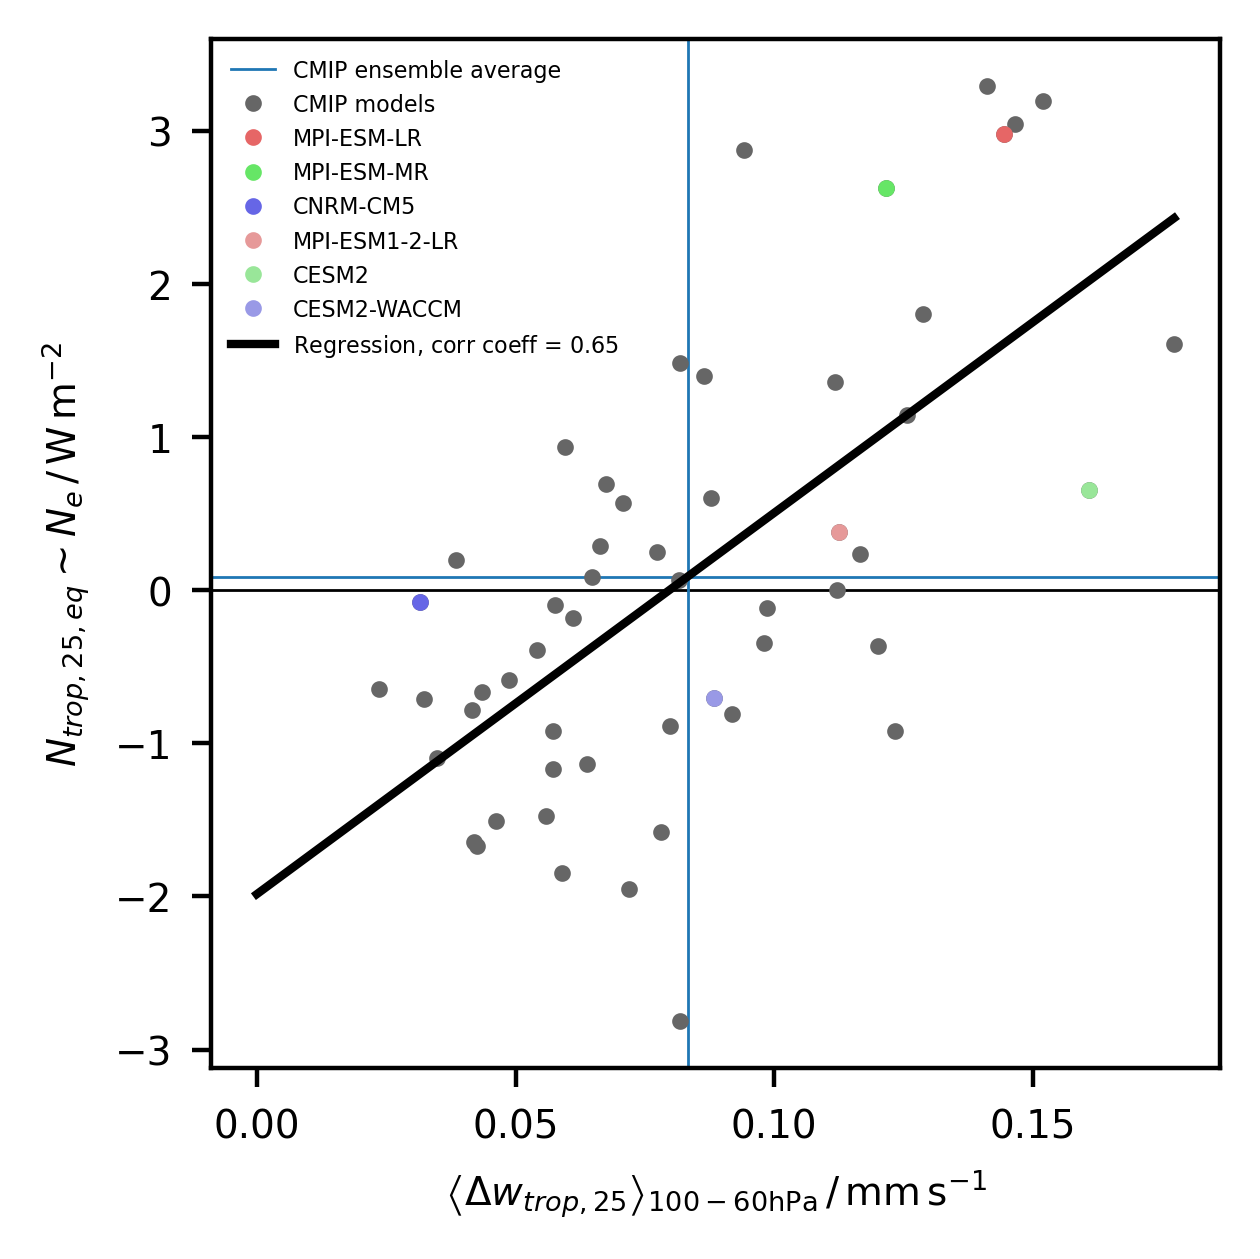

In [46]:
var = Nt_N_intercept
var_mean = Nt_N_intercept_mean
var_Δw = Ny_Δw
var_Δw_corrcoef = Ny_Δw_corrcoef
var_label = f"$N_{{trop, {tropband}, eq}}\sim N_{{e}}\,/\,\mathrm{{W}}\,\mathrm{{m}}^{{-2}}$"
var_name = "Ny"

fig = upcmip.plt.figure(figsize=(3.25, 3.25), dpi=400)
axes = fig.add_subplot(1,1,1)
axes.axhline(0, lw=0.5, c=(0,0,0))
axes.axhline(var_mean, lw=0.5)
axes.axvline(Δwt_avg_mean * 1000, lw=0.5, label="CMIP ensemble average")
axes.plot(
    upcmip.clima.np.array([Δwt_avg[model] * 1000 for model in p]),
    upcmip.clima.np.array([var[model] for model in p]),
    ls="", marker="o", markersize=2, c=(0.4,0.4,0.4),
    label="CMIP models",
)
color_models = {
    "MPI-ESM-LR": (0.9,0.4,0.4),
    "MPI-ESM-MR": (0.4,0.9,0.4),
    "CNRM-CM5": (0.4,0.4,0.9),
    "MPI-ESM1-2-LR": (0.9,0.6,0.6),
    "CESM2": (0.6,0.9,0.6),
    "CESM2-WACCM": (0.6,0.6,0.9),
}
for model in color_models:
    axes.plot(
        upcmip.clima.np.array([Δwt_avg[model] * 1000]),
        upcmip.clima.np.array([var[model]]),
        ls="", marker="o", markersize=2, c=color_models[model],
        label=f"{model}",
    )
Δw_avg_teo = upcmip.clima.np.linspace(
    0,#upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    1000,
)
axes.plot(
    Δw_avg_teo * 1000,
    var_Δw(Δw_avg_teo),
    ls="-",
    c=(0,0,0),
    label=f"Regression, corr coeff = ${var_Δw_corrcoef:0.2f}$",
)
axes.locator_params(axis="x", nbins=7)
axes.tick_params(which="both", labelsize=7)
axes.set_xlabel(f"$\\left<\Delta w_{{trop, {tropband}}}\\right>_{{100-60 \mathrm{{hPa}}}}\,/\,\mathrm{{mm}}\, \mathrm{{s}}^{{-1}}$", fontsize=7)
axes.set_ylabel(
    var_label,
    fontsize=7,
)
axes.legend(frameon=False, fancybox=False, fontsize=4)
fig.tight_layout()
fig.savefig("fig07.pdf", bbox_inches="tight")

# FIGURE 8. Relationship between the difference in tropical and extratropical feedbacks and the change in upwelling speed in CMIP models

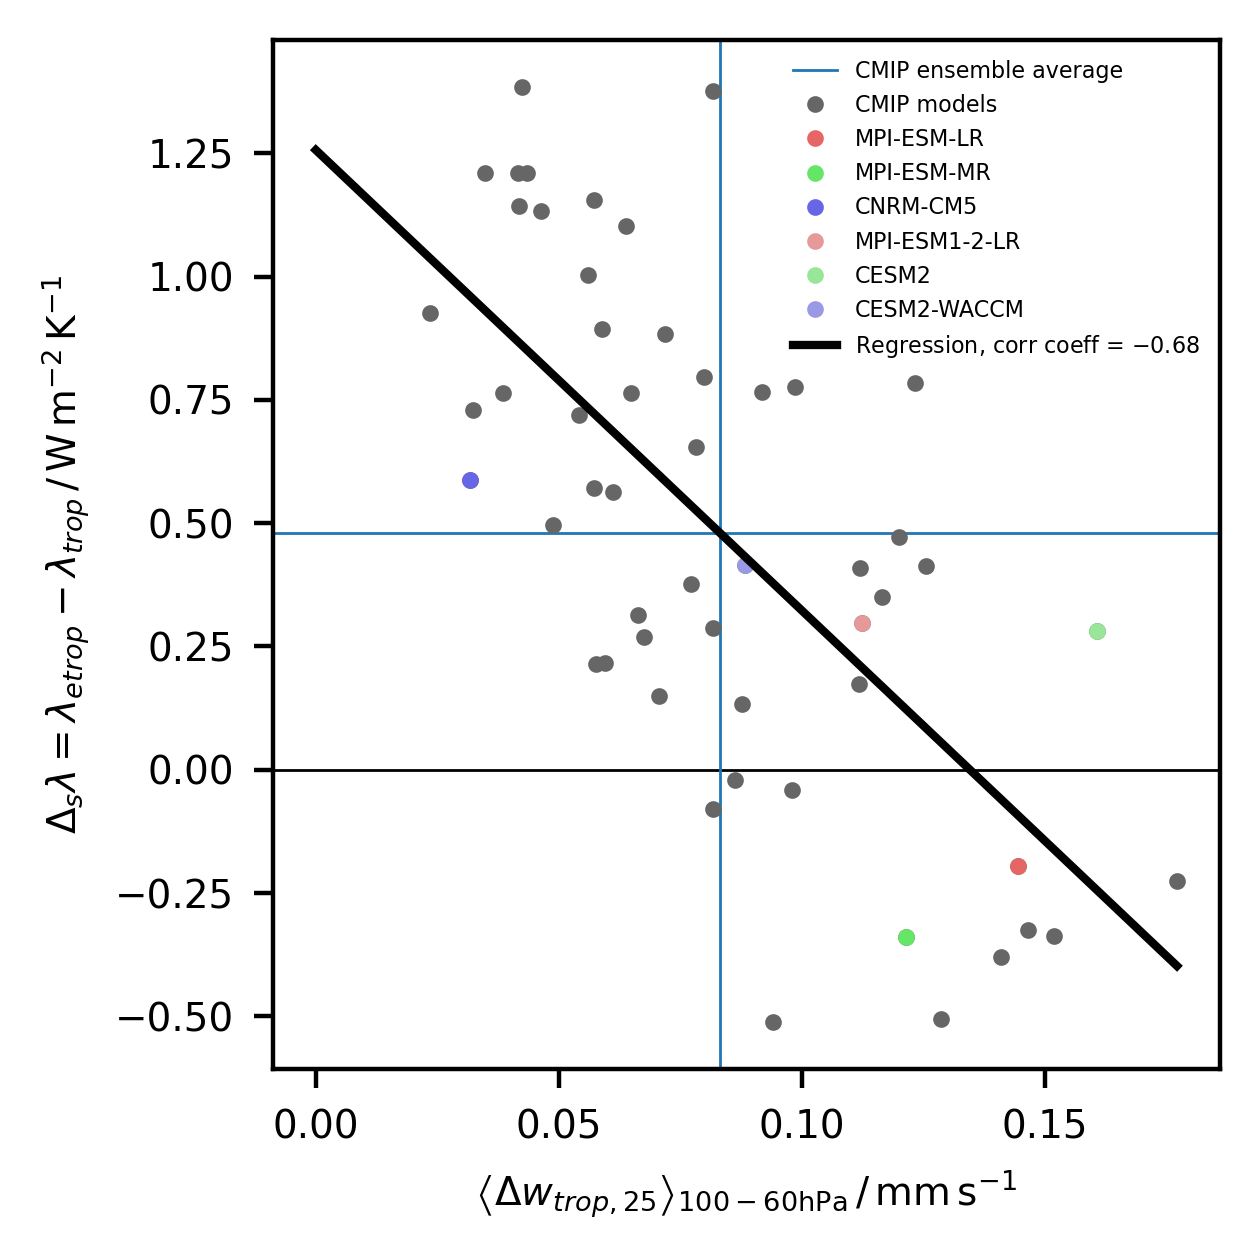

In [47]:
var = Δsλ
var_mean = Δsλ_mean
var_Δw = Δsλ_Δw
var_Δw_corrcoef = Δsλ_Δw_corrcoef
var_label = f"$\Delta_{{s}}\lambda = \lambda_{{etrop}} - \lambda_{{trop}}\,/\,\mathrm{{W}}\,\mathrm{{m}}^{{-2}}\,\mathrm{{K}}^{{-1}}$"
var_name = "Δsλ"

fig = upcmip.plt.figure(figsize=(3.25, 3.25), dpi=400)
axes = fig.add_subplot(1,1,1)
axes.axhline(0, lw=0.5, c=(0,0,0))
axes.axhline(var_mean, lw=0.5)
axes.axvline(Δwt_avg_mean * 1000, lw=0.5, label="CMIP ensemble average")
axes.plot(
    upcmip.clima.np.array([Δwt_avg[model] * 1000 for model in p]),
    upcmip.clima.np.array([var[model] for model in p]),
    ls="", marker="o", markersize=2, c=(0.4,0.4,0.4),
    label="CMIP models",
)
color_models = {
    "MPI-ESM-LR": (0.9,0.4,0.4),
    "MPI-ESM-MR": (0.4,0.9,0.4),
    "CNRM-CM5": (0.4,0.4,0.9),
    "MPI-ESM1-2-LR": (0.9,0.6,0.6),
    "CESM2": (0.6,0.9,0.6),
    "CESM2-WACCM": (0.6,0.6,0.9),
}
for model in color_models:
    axes.plot(
        upcmip.clima.np.array([Δwt_avg[model] * 1000]),
        upcmip.clima.np.array([var[model]]),
        ls="", marker="o", markersize=2, c=color_models[model],
        label=f"{model}",
    )
Δw_avg_teo = upcmip.clima.np.linspace(
    0,#upcmip.clima.np.array([Δwt_avg[model] for model in p]).min(),
    upcmip.clima.np.array([Δwt_avg[model] for model in p]).max(),
    1000,
)
axes.plot(
    Δw_avg_teo * 1000,
    var_Δw(Δw_avg_teo),
    ls="-",
    c=(0,0,0),
    label=f"Regression, corr coeff = ${var_Δw_corrcoef:0.2f}$",
)
axes.locator_params(axis="x", nbins=7)
axes.tick_params(which="both", labelsize=7)
axes.set_xlabel(f"$\\left<\Delta w_{{trop, {tropband}}}\\right>_{{100-60 \mathrm{{hPa}}}}\,/\,\mathrm{{mm}}\, \mathrm{{s}}^{{-1}}$", fontsize=7)
axes.set_ylabel(
    var_label,
    fontsize=7,
)
axes.legend(frameon=False, fancybox=False, fontsize=4)
fig.tight_layout()
fig.savefig("fig08.pdf", bbox_inches="tight")